In [27]:
import networkx
import random
import matplotlib.pyplot as plt
import copy

In [28]:
# create a small-world graph
import networkx as nx
#G = nx.watts_strogatz_graph(n=50,k=2,p=0.2)
G = nx.watts_strogatz_graph(n=50,k=3,p=0.2)
#G = nx.watts_strogatz_graph(n=50,k=4,p=0.2)
#G = nx.erdos_renyi_graph(n = 15, p=0.2)

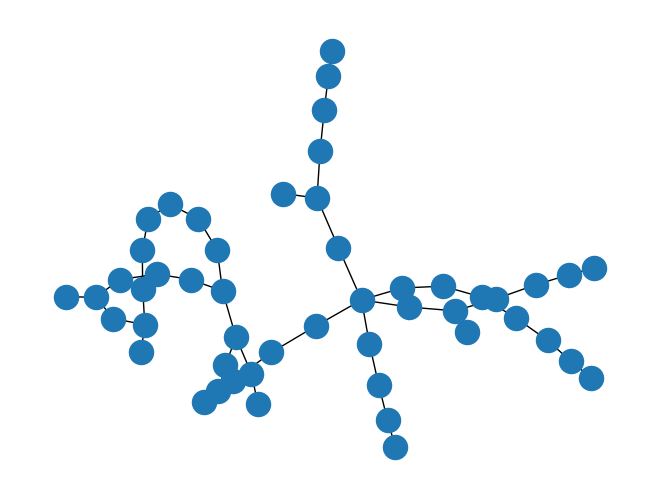

In [29]:
nx.draw(G)

In [30]:
four_colors = ['red', 'blue', 'green', 'yellow']
three_colors = ['red', 'blue', 'green']
two_colors = ['red', 'blue']
#color_mapping = {node: random.choice(colors) for node in G.nodes}

def assign_random_colors(G, colors):
    color_mapping = {node: random.choice(colors) for node in G.nodes}
    return color_mapping

def count_conflicts(G, color_mapping):
    conflicts = 0
    for node in G.nodes:
        node_color = color_mapping[node]
        neighbor_colors = {color_mapping[n] for n in G.neighbors(node)}
        #print(node_color)
        #print(neighbor_colors)
        conflicts += sum(1 for color in neighbor_colors if color == node_color)
    return conflicts 

def visualize_graph(G, color_mapping):
    node_colors = [color_mapping[node] for node in G.nodes]
    nx.draw(G, with_labels=True, node_color=node_colors)
    plt.show()
    
# Function to update nodes with conflicts to reduce conflicts
def reduce_conflicts(G, color_mapping, colors):
    for node in G.nodes:
        node_color = color_mapping[node]
        neighbor_colors = {color_mapping[n] for n in G.neighbors(node)}
        conflict_count = sum(1 for color in neighbor_colors if color == node_color)
        if conflict_count > 0:
            # Generate a new color for the node
            new_color = random.choice([c for c in colors if c != node_color])
            color_mapping[node] = new_color
    return color_mapping

# Function to update nodes with conflicts to reduce conflicts, prioritizing nodes with lower degrees
def reduce_conflicts_priority(G, color_mapping, colors):
    # Sort nodes by degree in ascending order
    nodes_by_degree = sorted(G.nodes, key=lambda node: G.degree(node))
    for node in nodes_by_degree:
        node_color = color_mapping[node]
        neighbor_colors = {color_mapping[n] for n in G.neighbors(node)}
        conflict_count = sum(1 for color in neighbor_colors if color == node_color)
        if conflict_count > 0:
            # Generate a new color for the node
            new_color = random.choice([c for c in colors if c != node_color])
            color_mapping[node] = new_color
            conflict_count = sum(1 for color in neighbor_colors if color == node_color)
    return color_mapping

Graph before reducing the number of conflicts for four colors


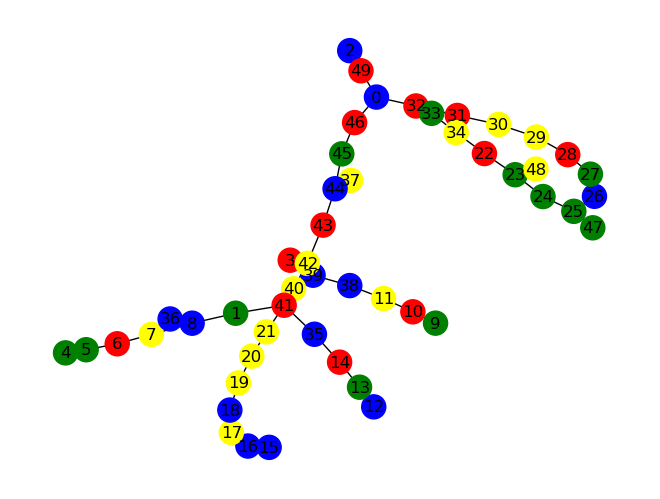

Number of conflicts in the graph above:  19


In [31]:
# FOUR COLORS
four_colors_mapping = assign_random_colors(G, four_colors)
original_four_colors_mapping_copy = copy.deepcopy(four_colors_mapping)

print("Graph before reducing the number of conflicts for four colors")
visualize_graph(G, four_colors_mapping)

conflicts = count_conflicts(G, four_colors_mapping)
print("Number of conflicts in the graph above: ", conflicts)

Number of conflicts in graph below:  4
0 iterations



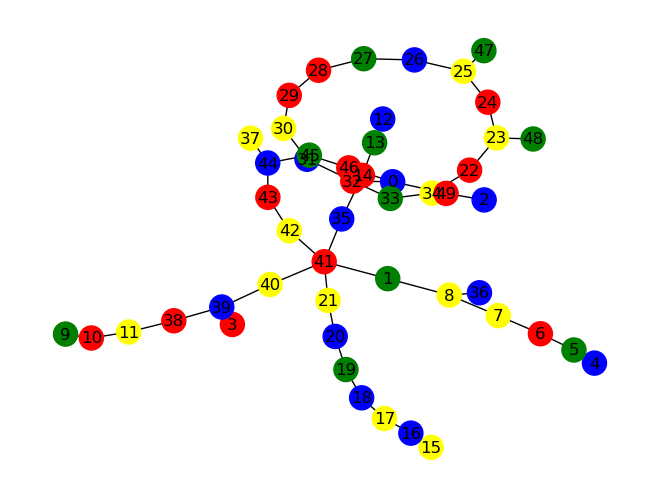



Number of conflicts in graph below:  2
1 iterations



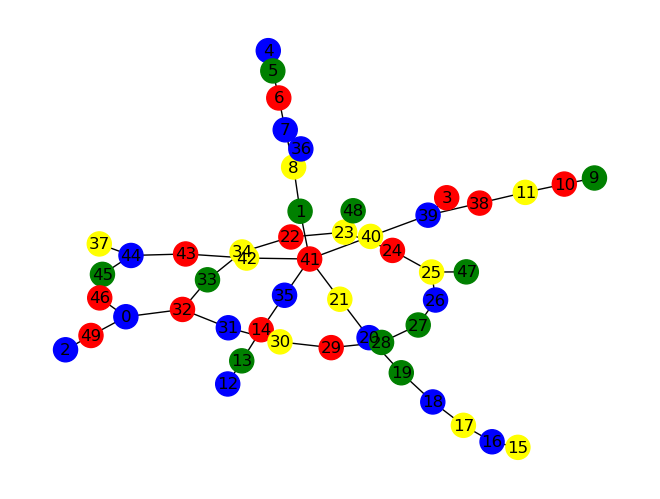



Number of conflicts in graph below:  2
2 iterations



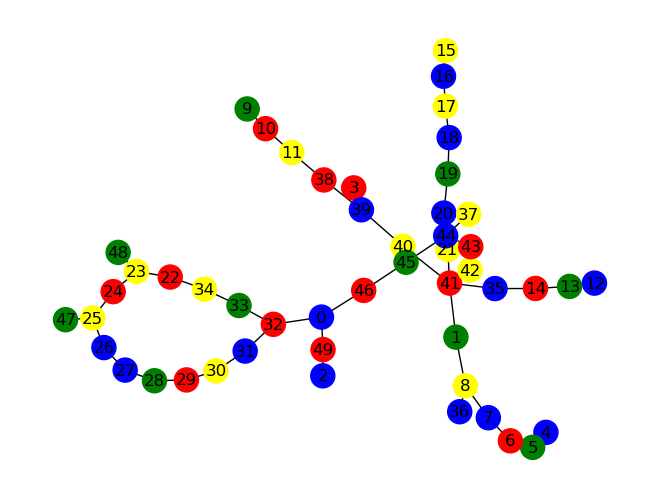



Number of conflicts in graph below:  0
3 iterations



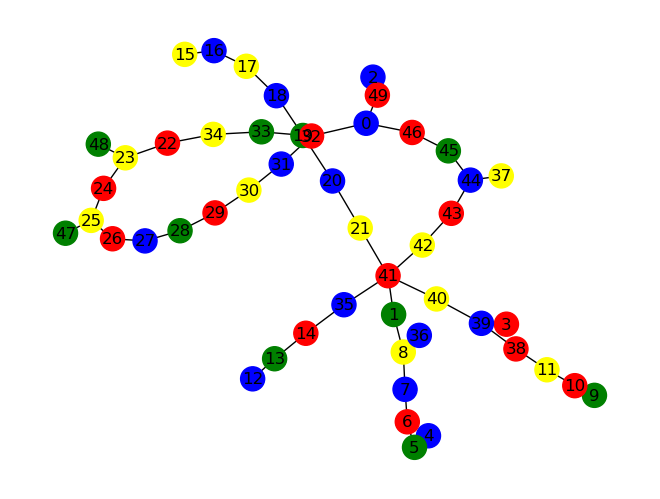

In [32]:
#while conflicts != 0:
#    color_mapping = reduce_conflicts(G, color_mapping, four_colors)
#    conflicts = count_conflicts(G, color_mapping)
#    print("Number of conflicts in graph below: ", conflicts)
#    visualize_graph(G, color_mapping)
    
list_conflicts = []

for i in range(0,51):
    four_colors_mapping = reduce_conflicts(G, four_colors_mapping, four_colors)
    conflicts = count_conflicts(G, four_colors_mapping)
    print("Number of conflicts in graph below: ", conflicts)
    print(i, "iterations\n")
    visualize_graph(G, four_colors_mapping)
    list_conflicts.append(conflicts)
    #print("The smallest number of conflicts recorded is",min(list_conflicts))
    print("\n")
    if conflicts == 0:
        break   

# For four colors the graph took 3 iterations to reach zero conflicts.

Graph before reducing the number of conflicts for three colors


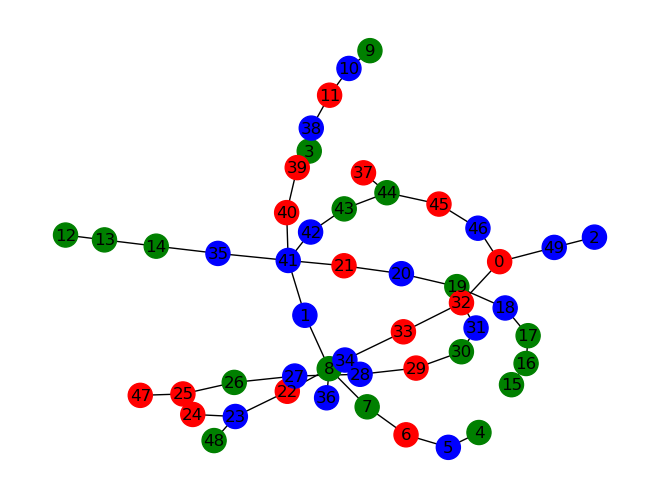

Number of conflicts in the graph above:  26


In [33]:
# THREE COLORS
three_color_mapping = assign_random_colors(G, three_colors)
original_three_colors_mapping_copy = copy.deepcopy(three_color_mapping)

print("Graph before reducing the number of conflicts for three colors")
visualize_graph(G, three_color_mapping)

conflicts = count_conflicts(G, three_color_mapping)
print("Number of conflicts in the graph above: ", conflicts)

Number of conflicts in graph below:  18
0 iterations



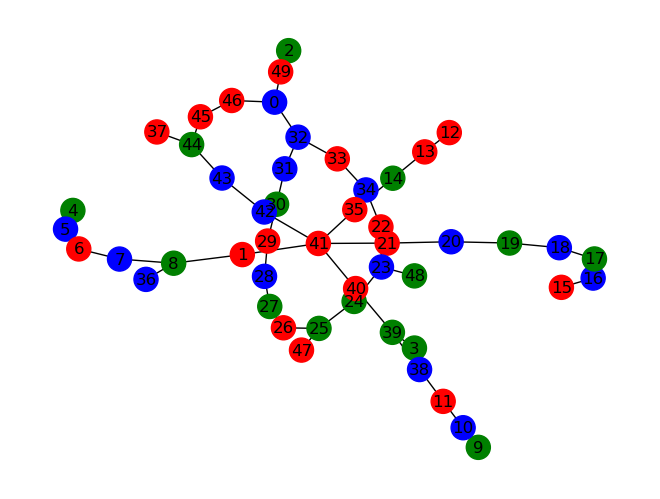



Number of conflicts in graph below:  8
1 iterations



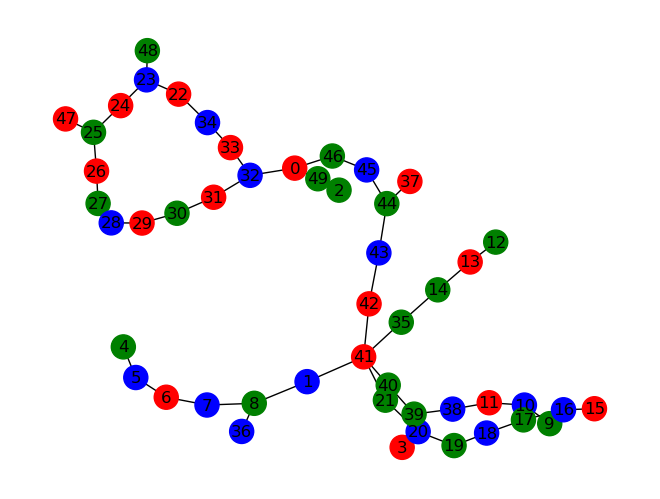



Number of conflicts in graph below:  8
2 iterations



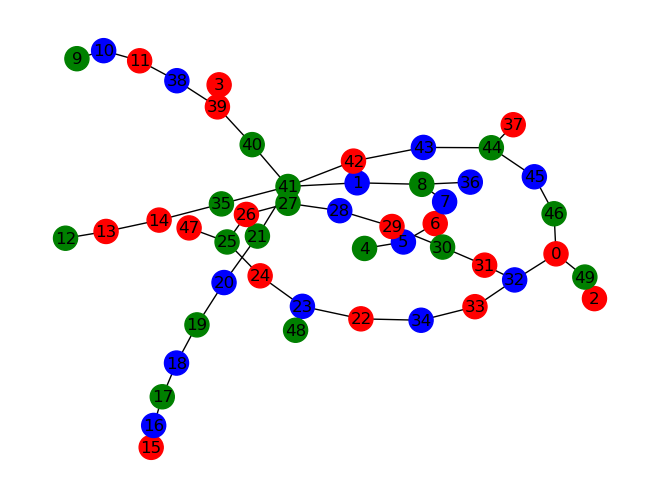



Number of conflicts in graph below:  4
3 iterations



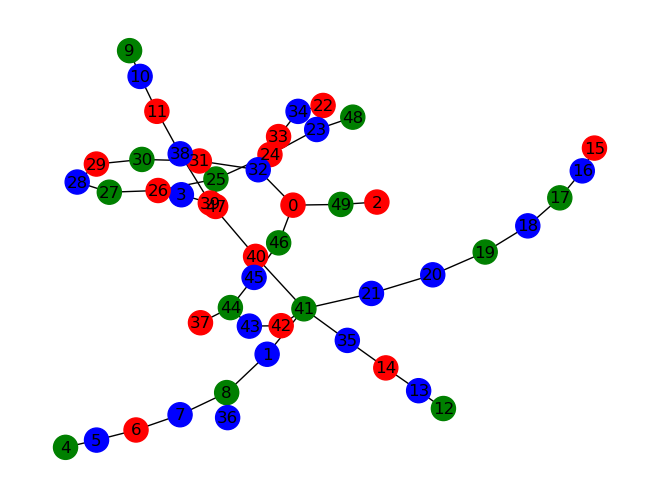



Number of conflicts in graph below:  2
4 iterations



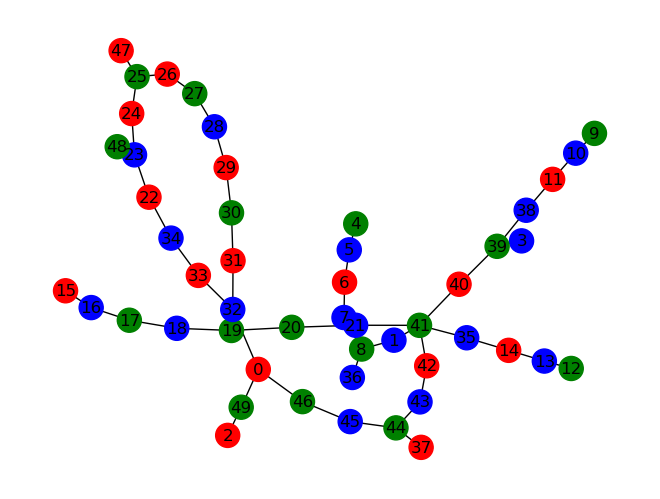



Number of conflicts in graph below:  2
5 iterations



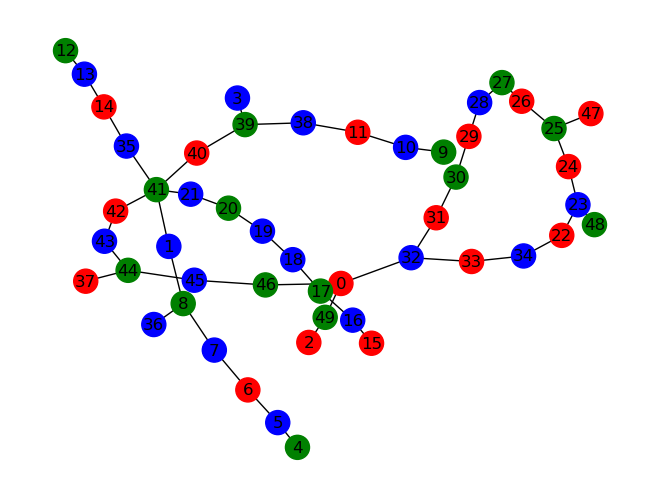



Number of conflicts in graph below:  0
6 iterations



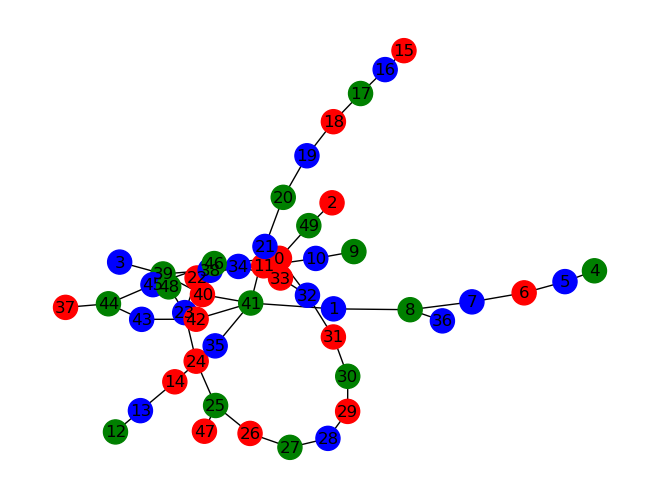

In [34]:
#while conflicts != 0:
#    color_mapping = reduce_conflicts(G, color_mapping, three_colors)
#    conflicts = count_conflicts(G, color_mapping)
#    print("Number of conflicts in graph below: ", conflicts)
#    visualize_graph(G, color_mapping)
    
list_conflicts = []

for i in range(0,51):
    three_color_mapping = reduce_conflicts(G, three_color_mapping, three_colors)
    conflicts = count_conflicts(G, three_color_mapping)
    print("Number of conflicts in graph below: ", conflicts)
    print(i, "iterations\n")
    visualize_graph(G, three_color_mapping)
    list_conflicts.append(conflicts)
    #print("The smallest number of conflicts recorded is",min(list_conflicts))
    print("\n")
    if conflicts == 0:
        break   

# For three colors the graph took 6 iterations to reach zero conflicts.

Graph before reducing the number of conflicts for two colors


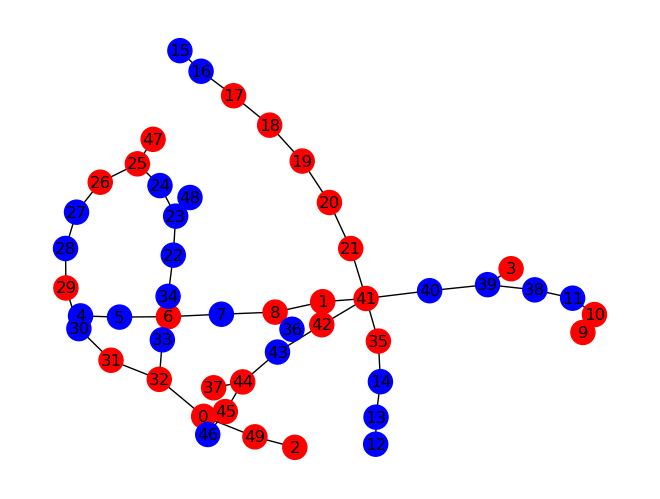

Number of conflicts in the graph above:  42


In [35]:
# TWO COLORS
two_color_mapping = assign_random_colors(G, two_colors)
original_two_colors_mapping_copy = copy.deepcopy(two_color_mapping)

print("Graph before reducing the number of conflicts for two colors")
visualize_graph(G, two_color_mapping)

conflicts = count_conflicts(G, two_color_mapping)
print("Number of conflicts in the graph above: ", conflicts)

Number of conflicts in graph below:  33
0 iterations



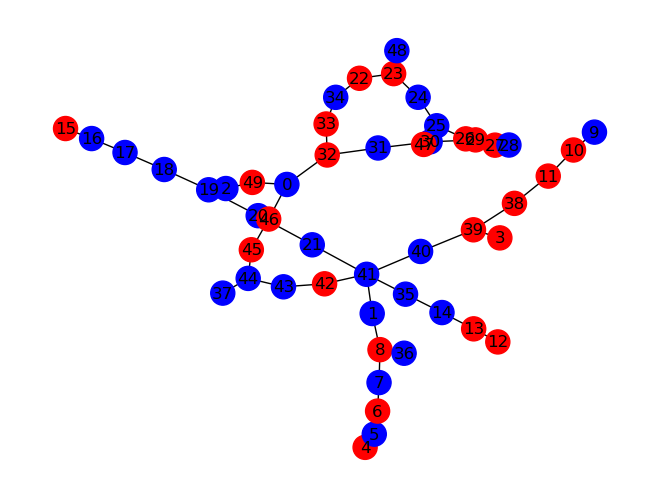

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  33
1 iterations



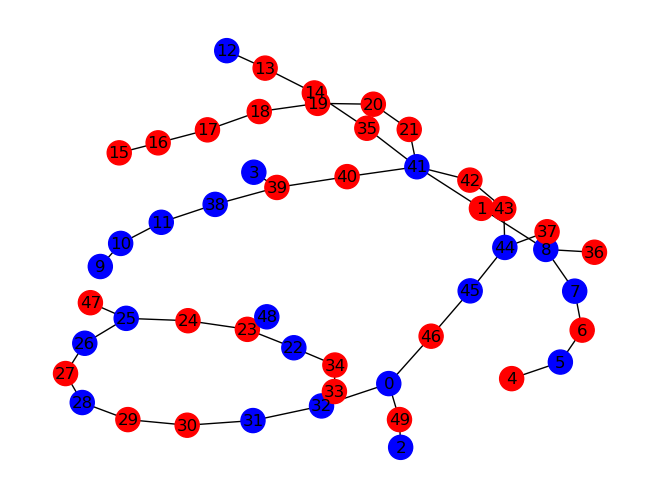

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  36
2 iterations



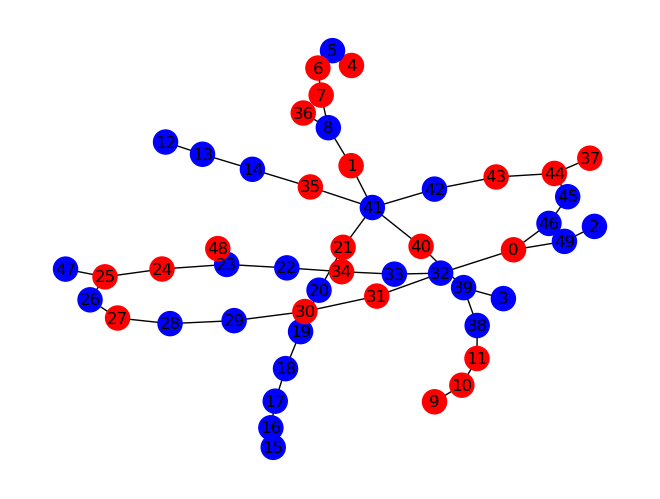

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  33
3 iterations



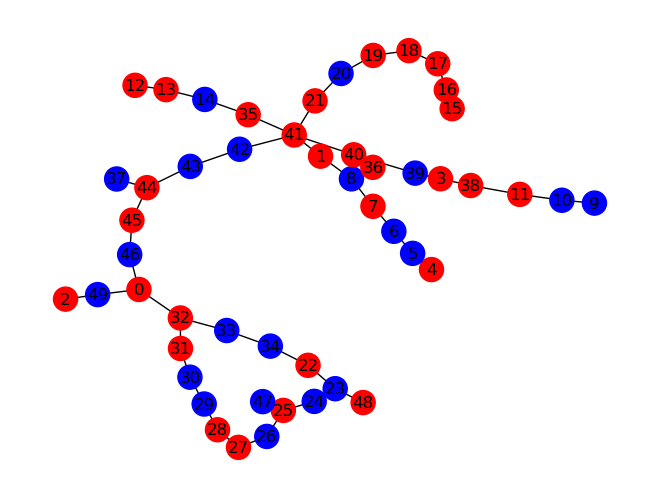

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  35
4 iterations



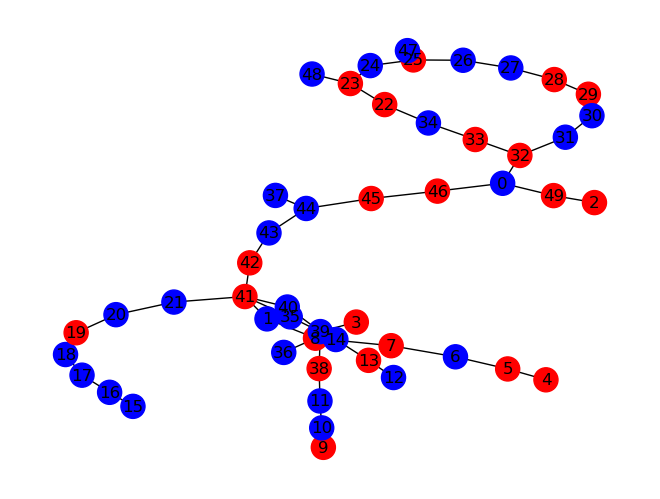

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  34
5 iterations



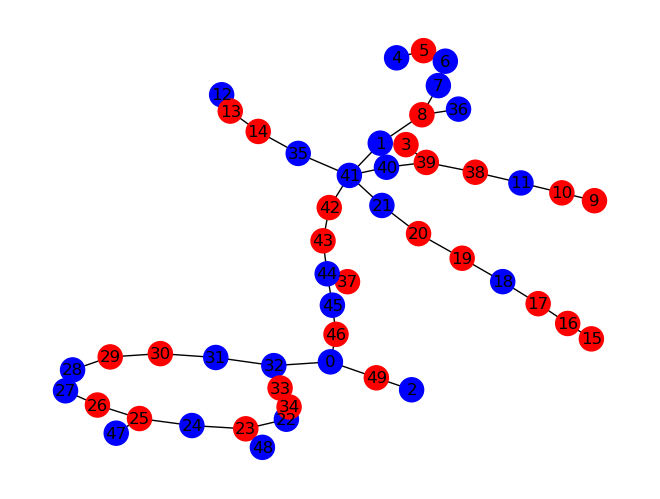

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  37
6 iterations



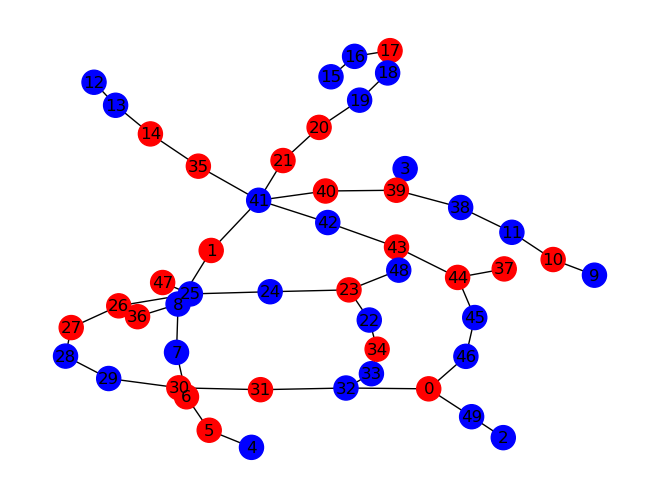

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  35
7 iterations



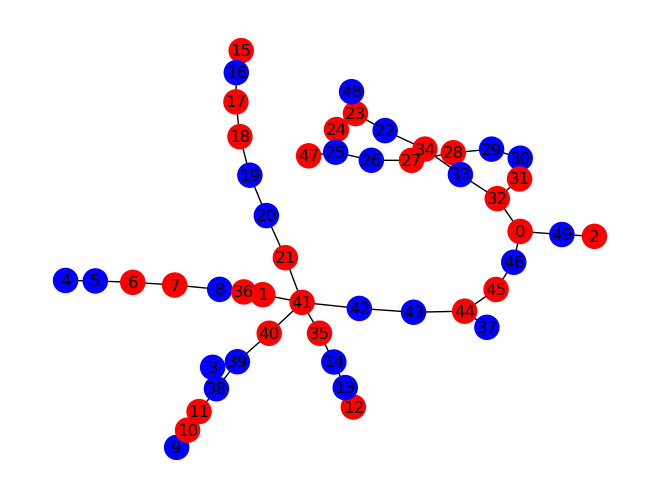

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  39
8 iterations



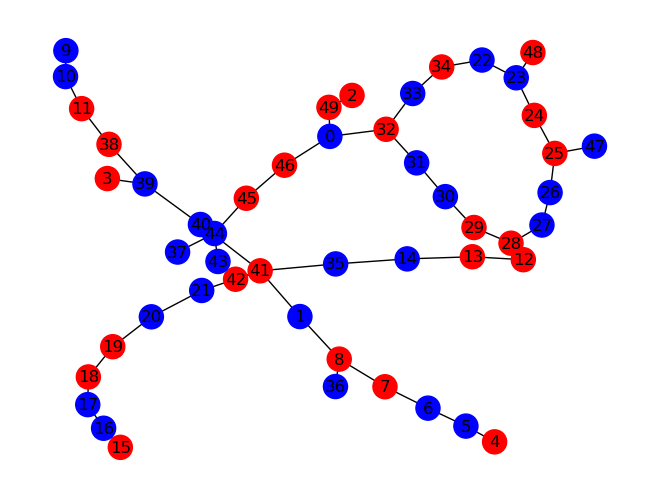

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  36
9 iterations



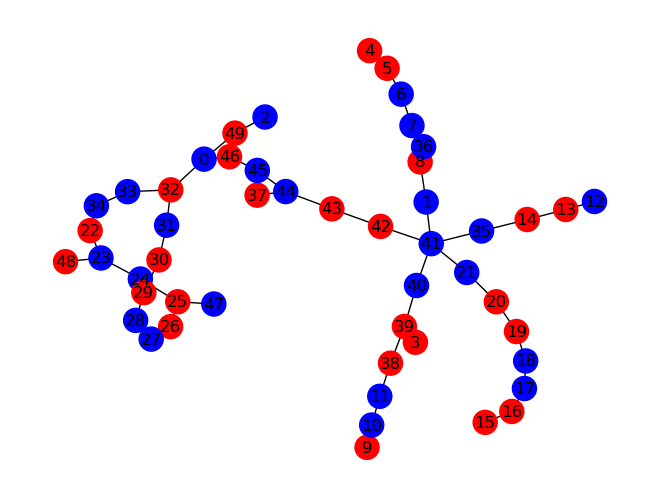

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  35
10 iterations



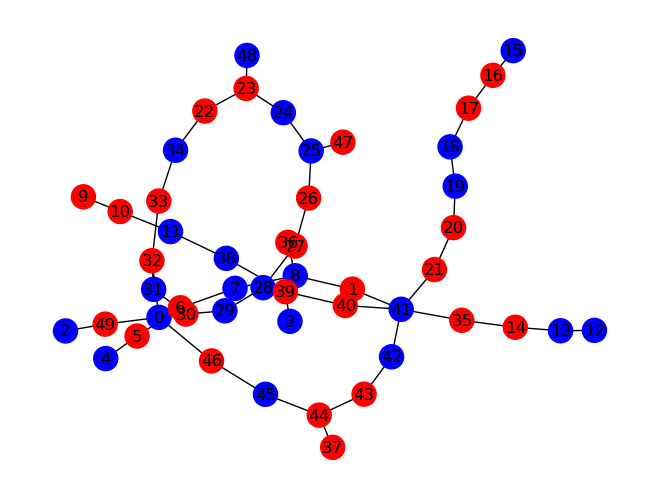

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  35
11 iterations



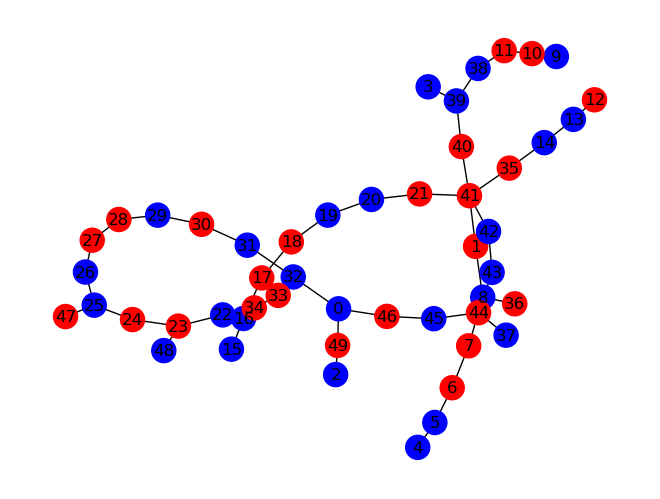

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  36
12 iterations



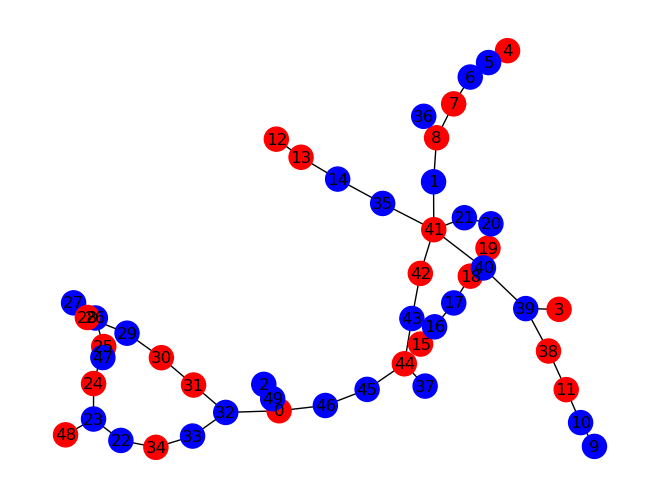

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  35
13 iterations



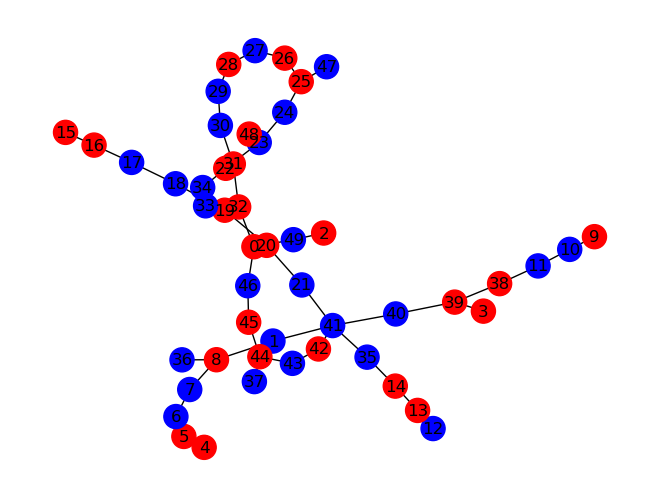

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  37
14 iterations



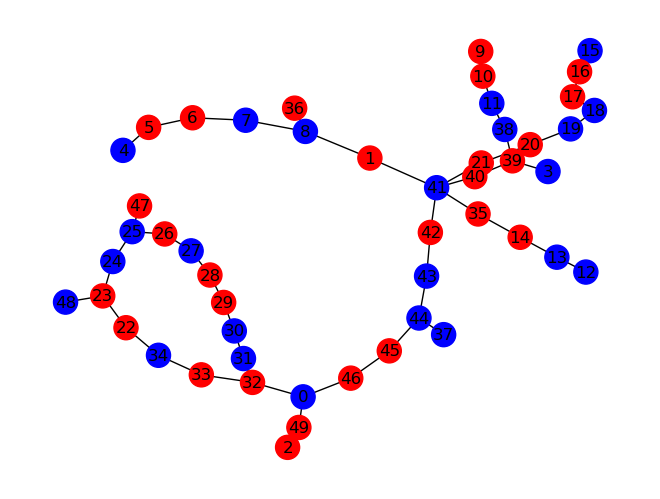

The smallest number of conflicts recorded is 33


Number of conflicts in graph below:  32
15 iterations



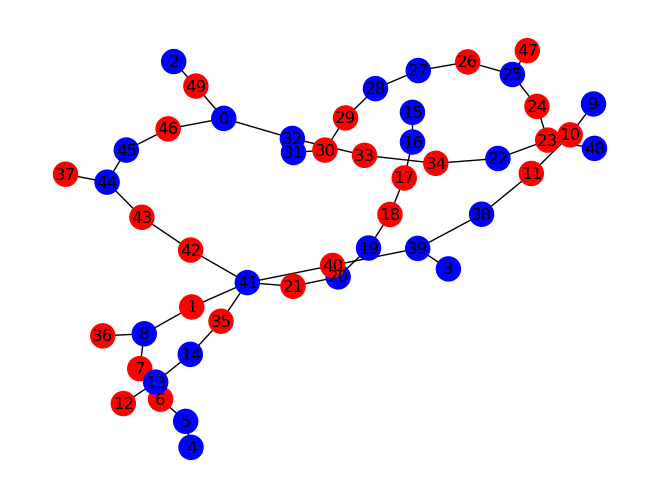

The smallest number of conflicts recorded is 32


Number of conflicts in graph below:  31
16 iterations



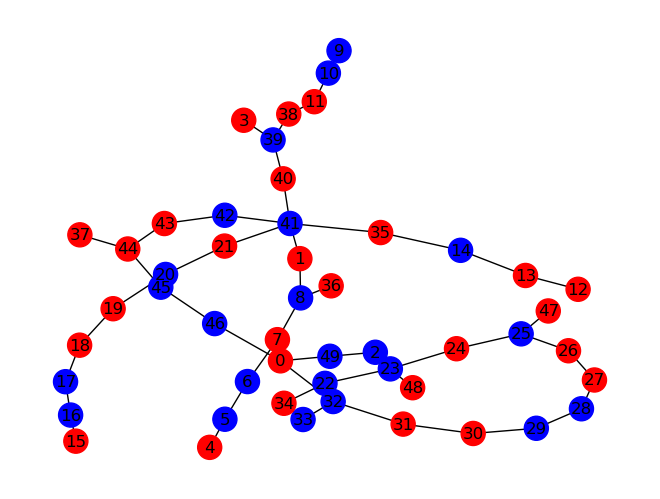

The smallest number of conflicts recorded is 31


Number of conflicts in graph below:  28
17 iterations



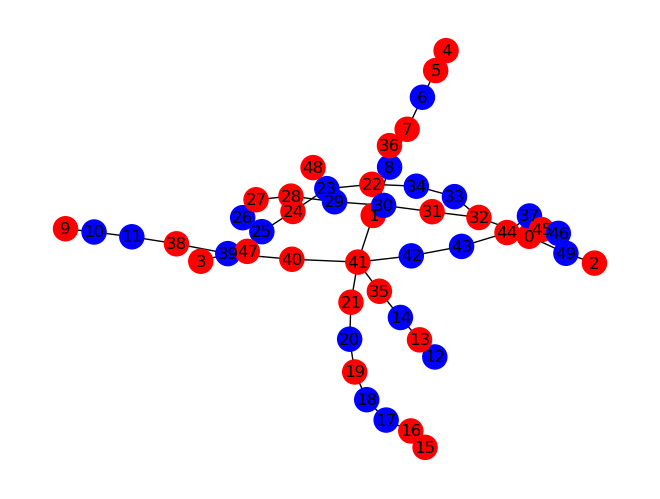

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  31
18 iterations



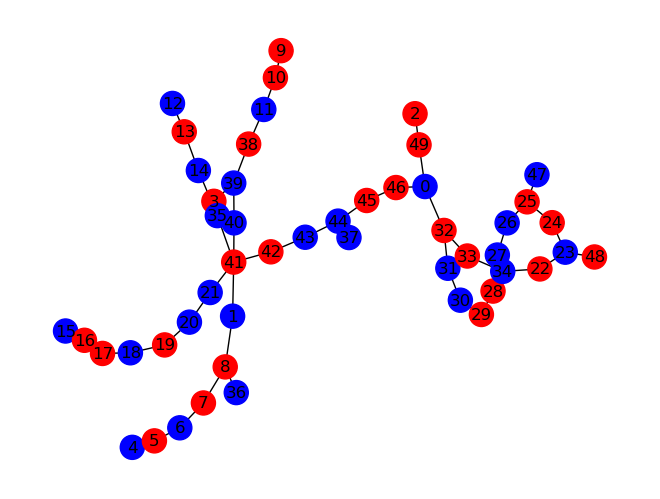

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  31
19 iterations



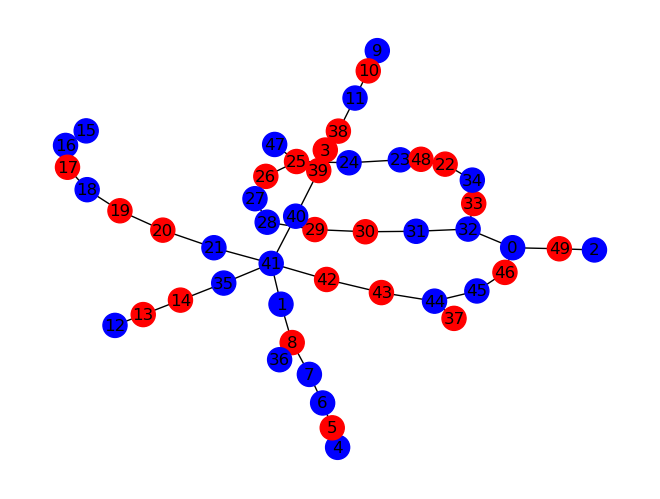

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
20 iterations



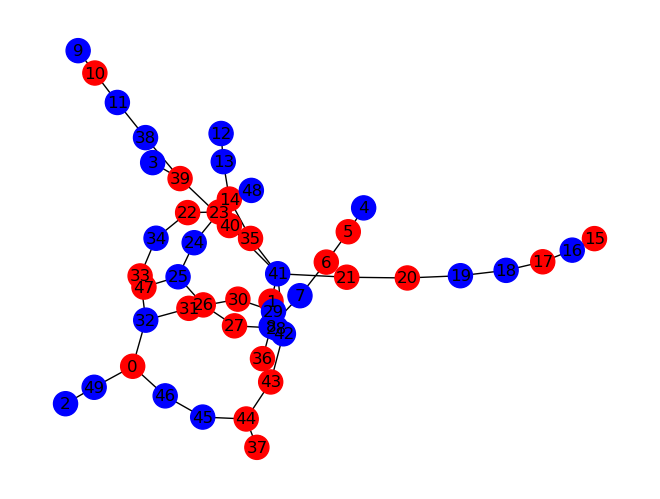

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  34
21 iterations



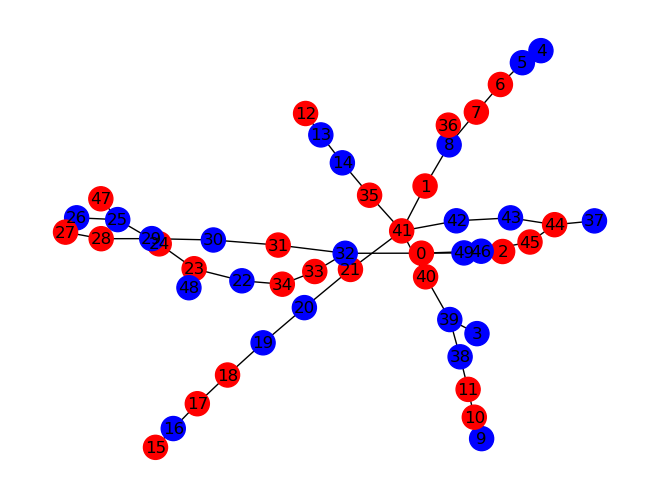

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
22 iterations



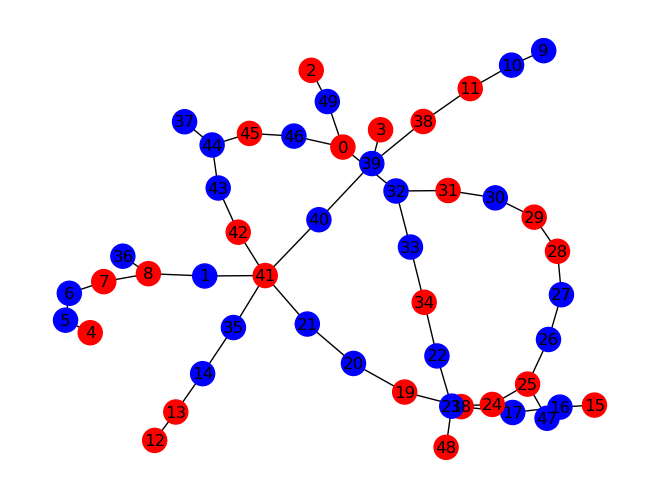

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
23 iterations



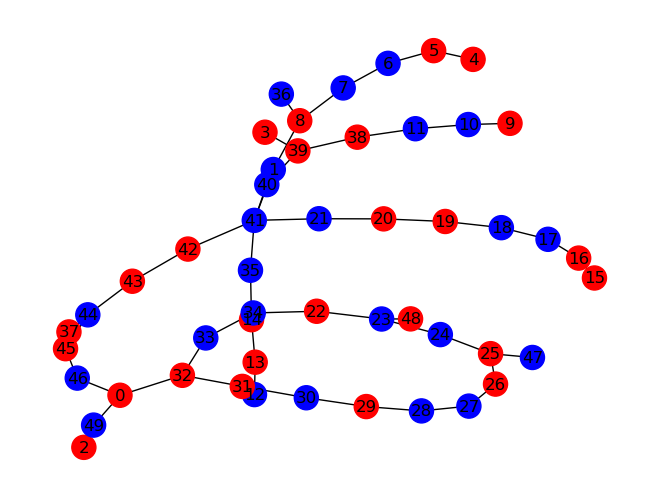

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  36
24 iterations



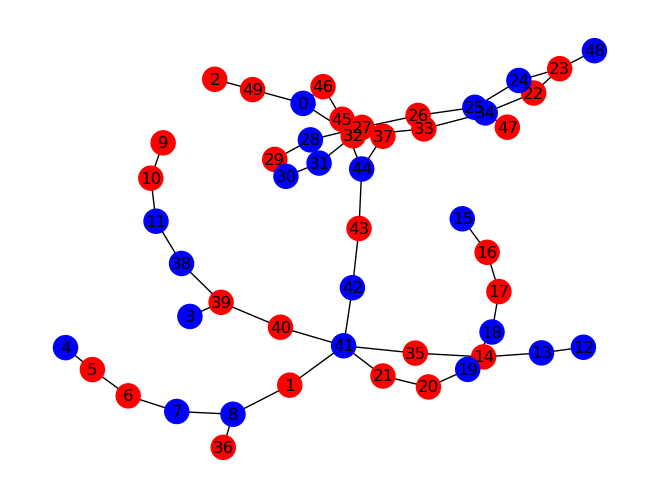

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
25 iterations



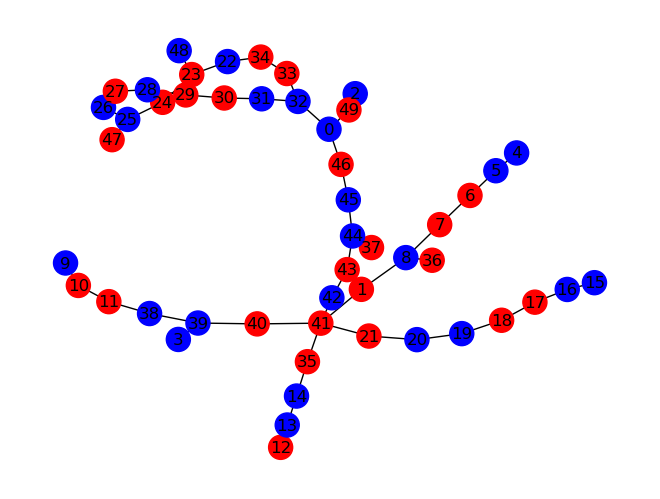

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  37
26 iterations



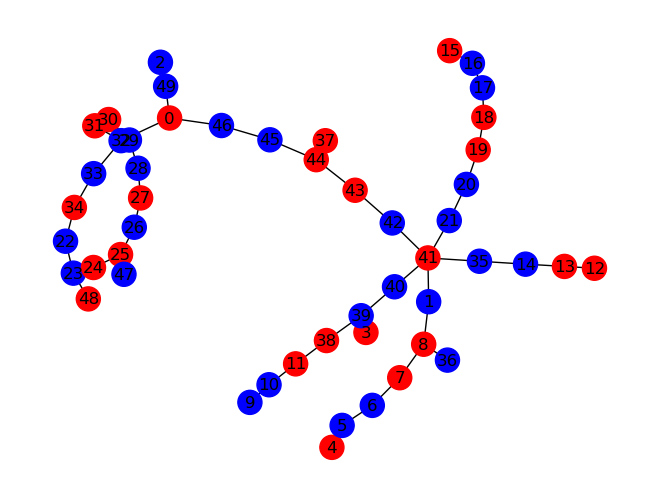

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  32
27 iterations



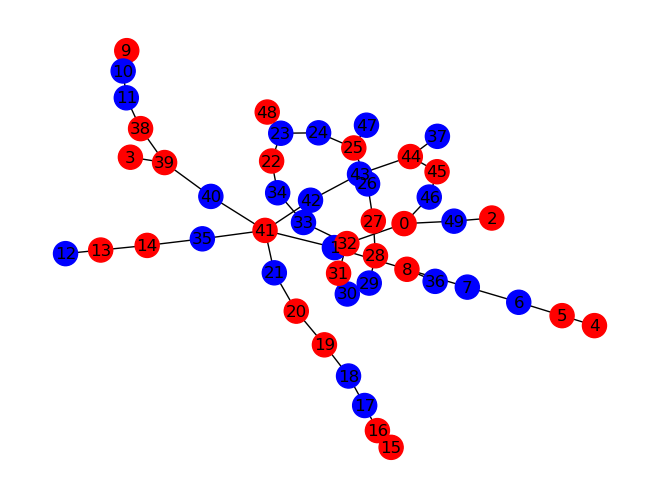

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  31
28 iterations



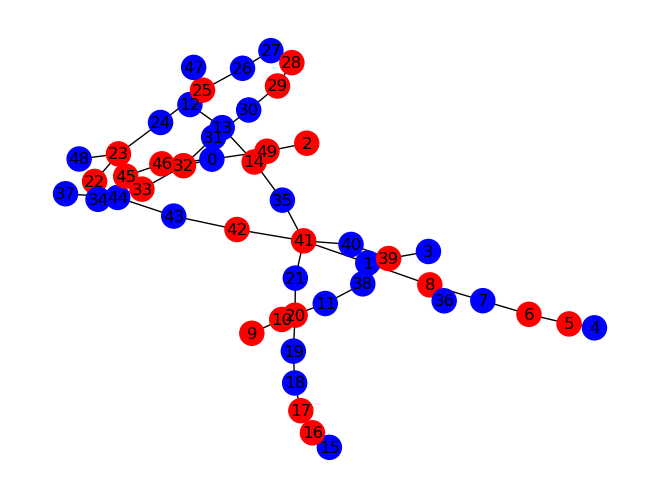

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  28
29 iterations



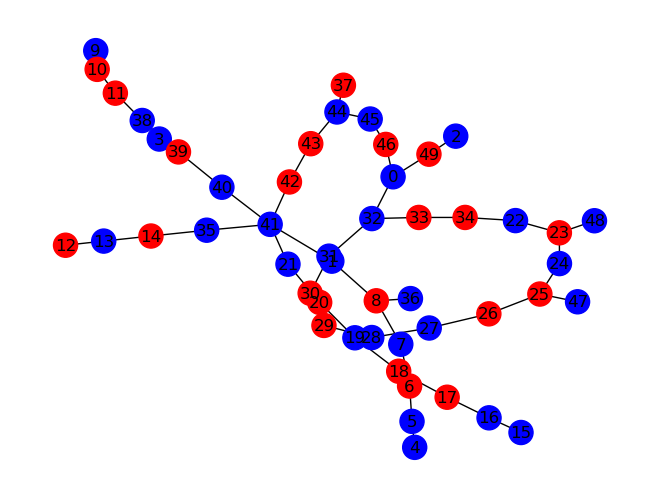

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  31
30 iterations



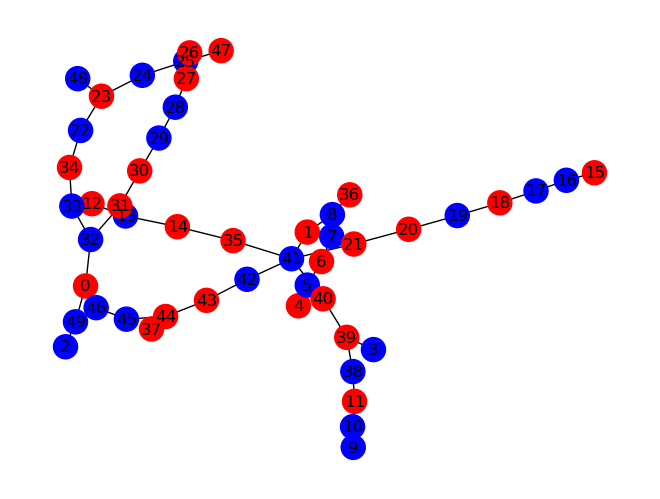

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  31
31 iterations



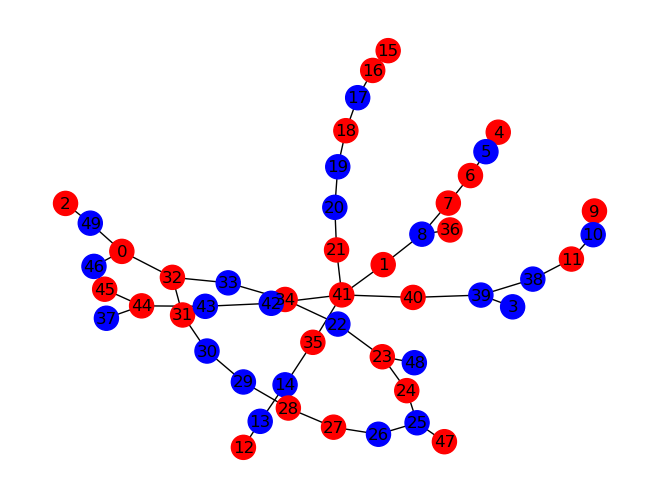

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
32 iterations



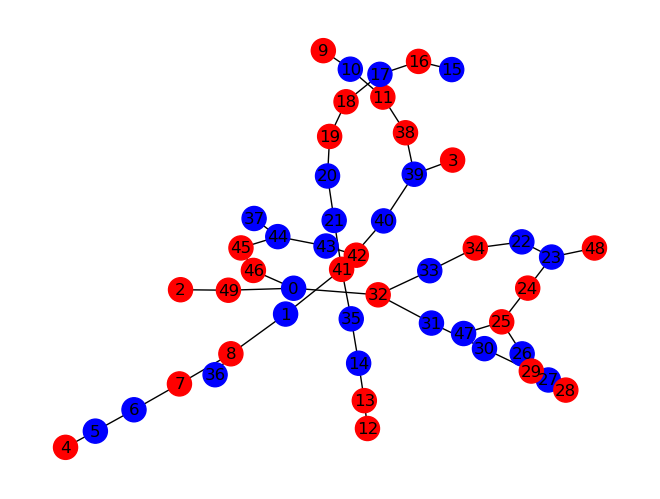

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  34
33 iterations



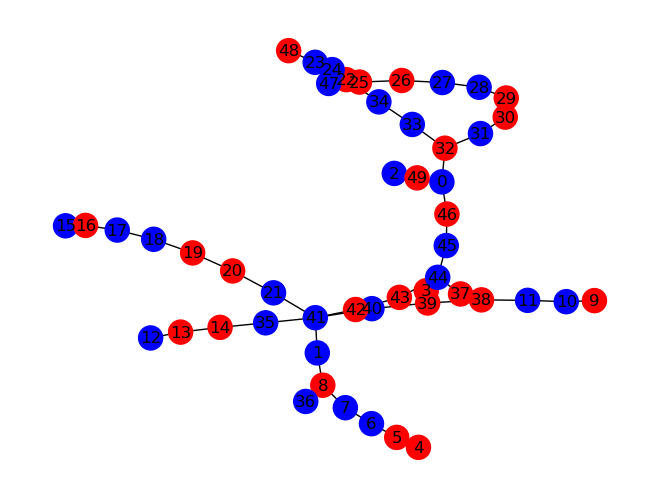

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
34 iterations



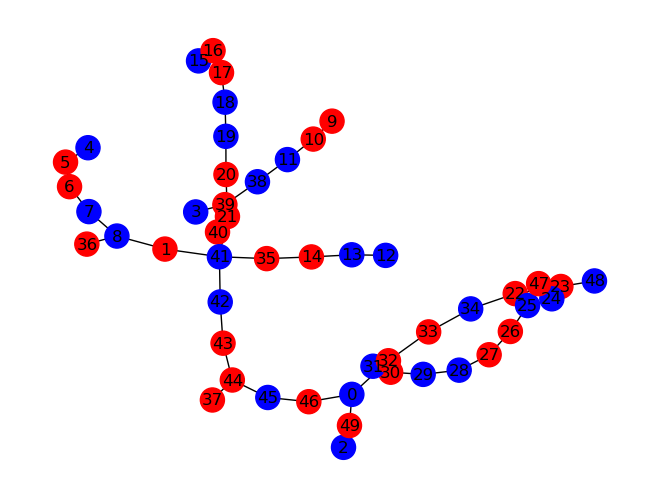

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
35 iterations



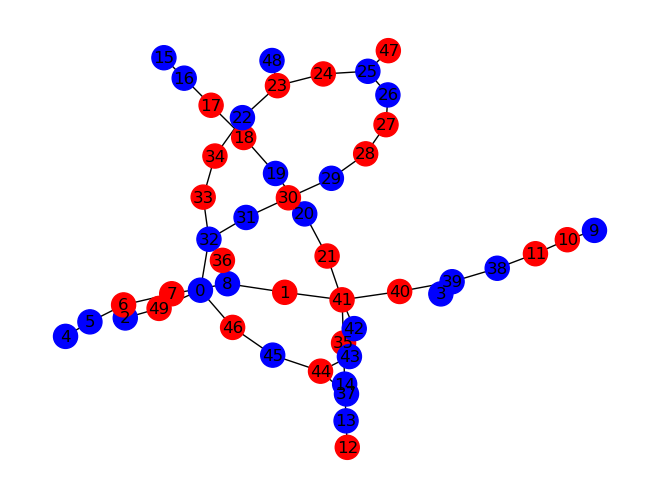

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  36
36 iterations



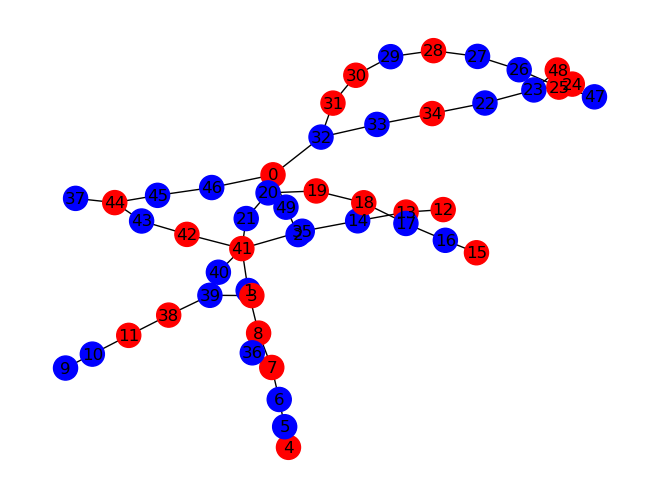

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
37 iterations



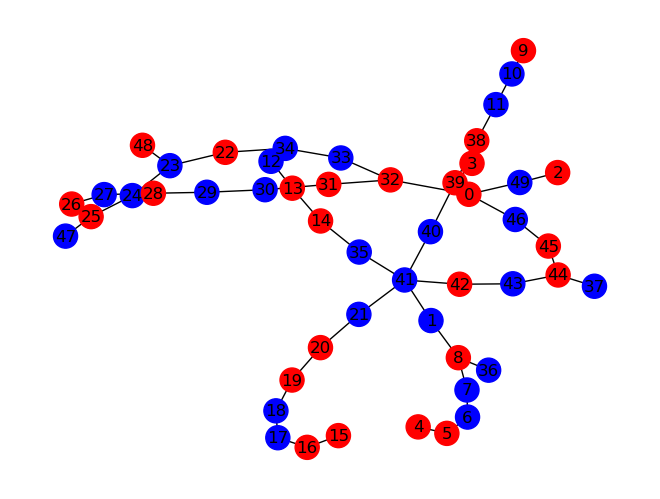

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  37
38 iterations



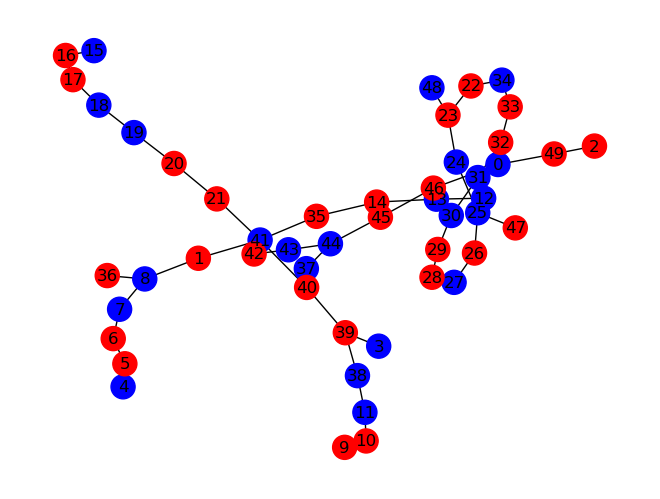

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  32
39 iterations



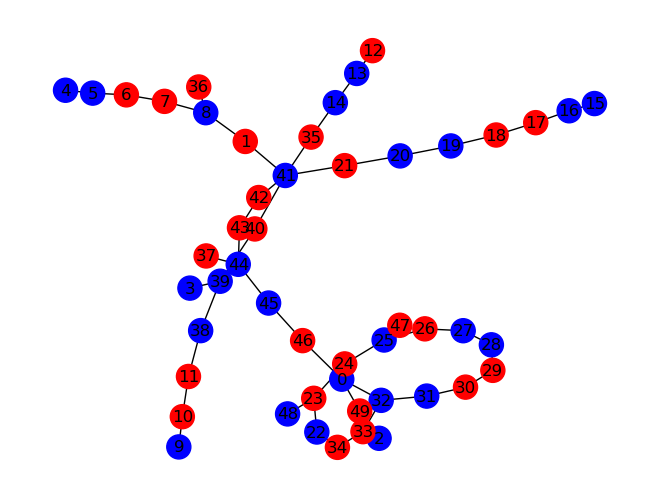

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  31
40 iterations



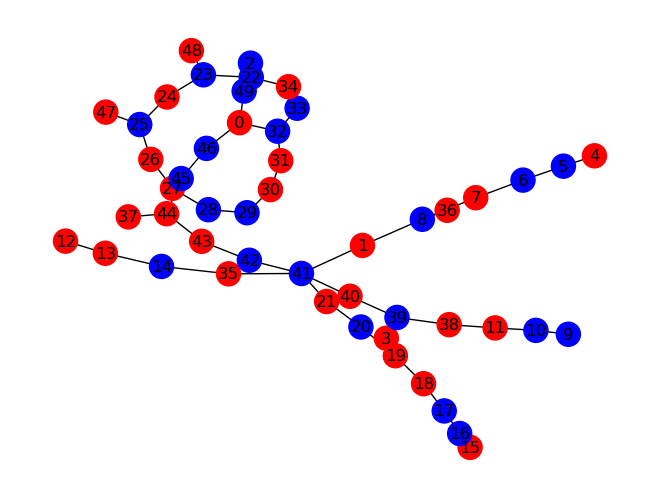

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  28
41 iterations



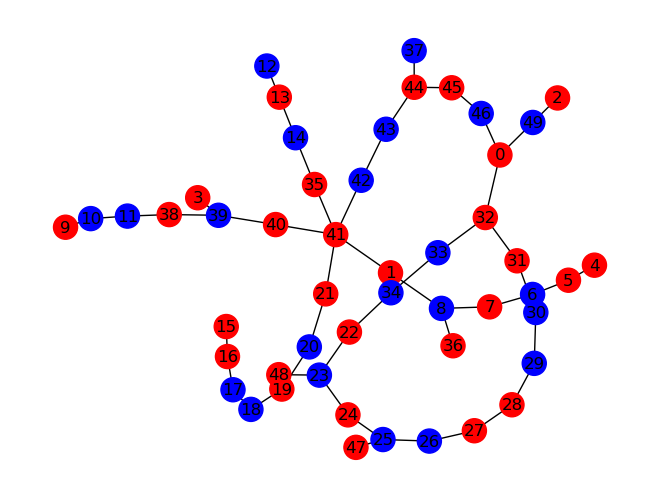

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  31
42 iterations



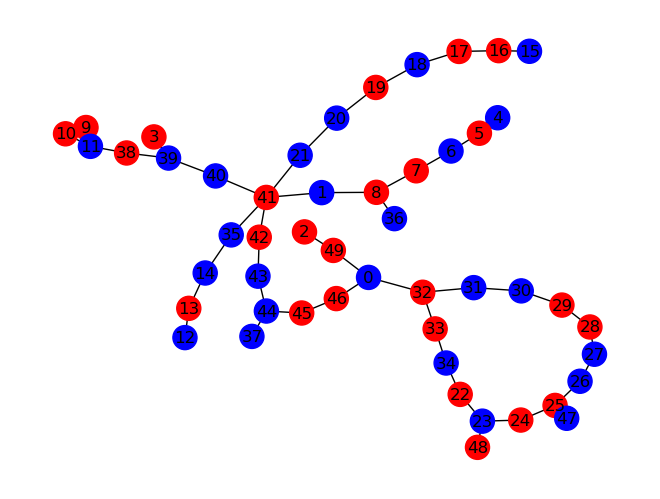

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  31
43 iterations



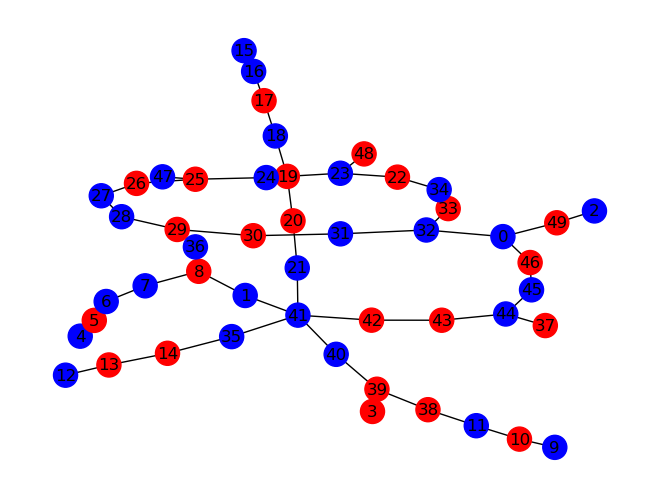

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
44 iterations



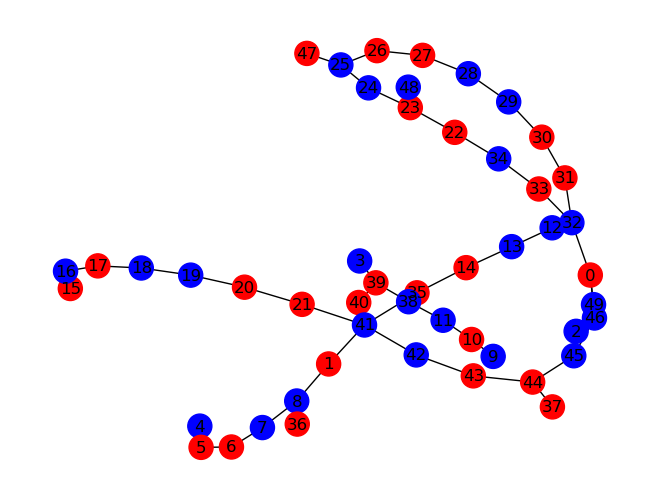

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  34
45 iterations



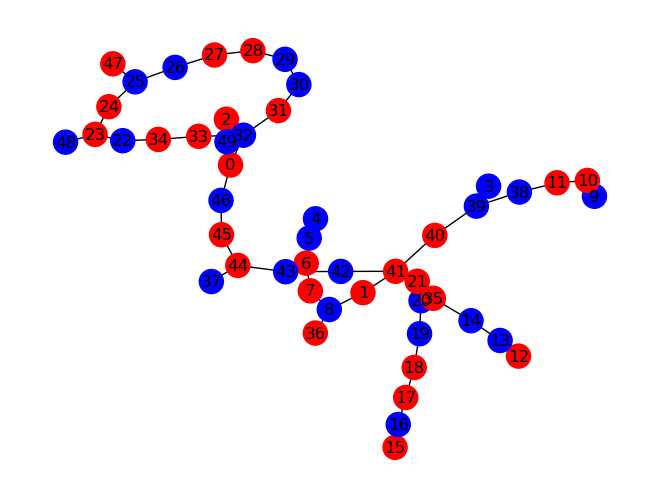

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
46 iterations



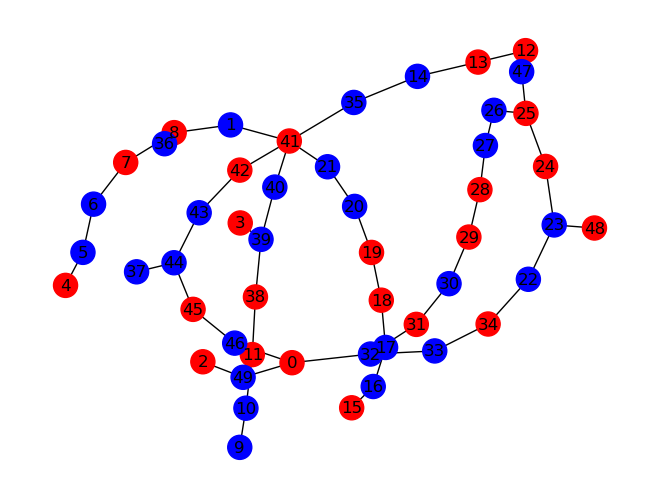

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
47 iterations



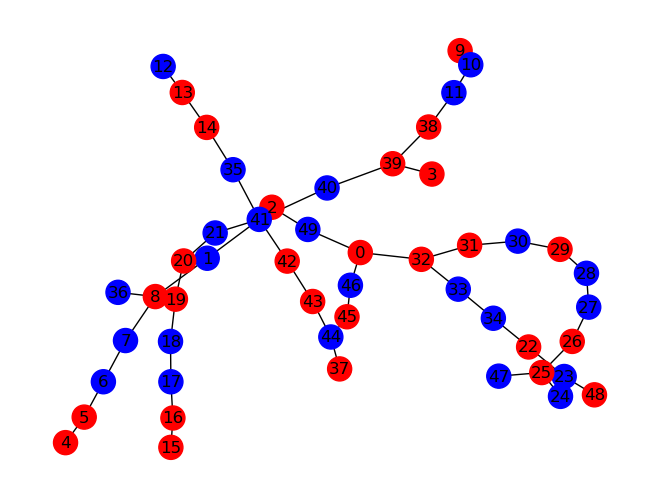

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  36
48 iterations



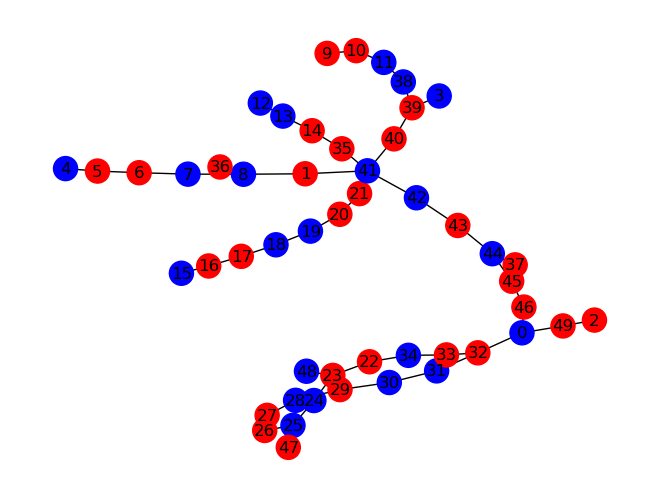

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  35
49 iterations



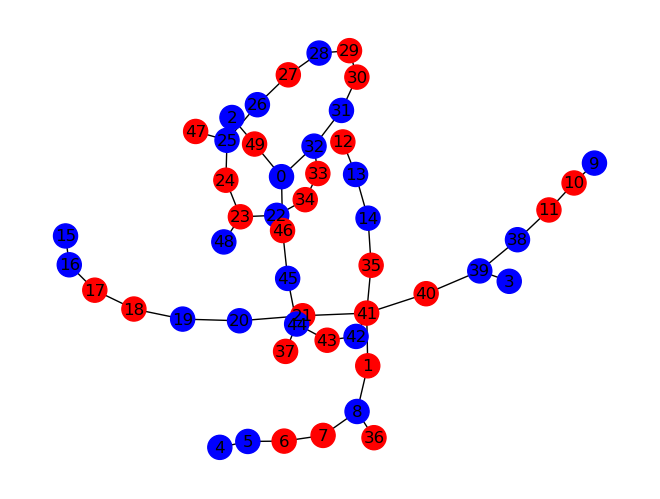

The smallest number of conflicts recorded is 28


Number of conflicts in graph below:  37
50 iterations



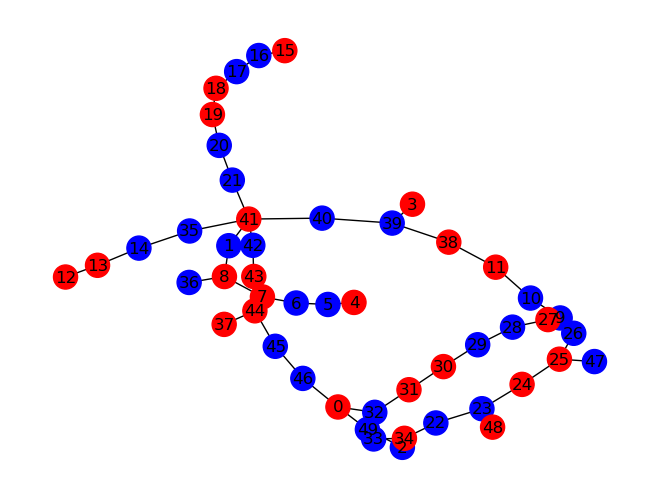

The smallest number of conflicts recorded is 28




In [36]:
list_conflicts = []

for i in range(0,51):
    two_color_mapping = reduce_conflicts(G, two_color_mapping, two_colors)
    conflicts = count_conflicts(G, two_color_mapping)
    print("Number of conflicts in graph below: ", conflicts)
    print(i, "iterations\n")
    visualize_graph(G, two_color_mapping)
    list_conflicts.append(conflicts)
    print("The smallest number of conflicts recorded is",min(list_conflicts))
    print("\n")
    if conflicts == 0:
        break   

# For two colors the graph never reached zero conflicts. The lowest number of conflicts reached was 28.

Number of conflicts in graph below:  2
0 iterations



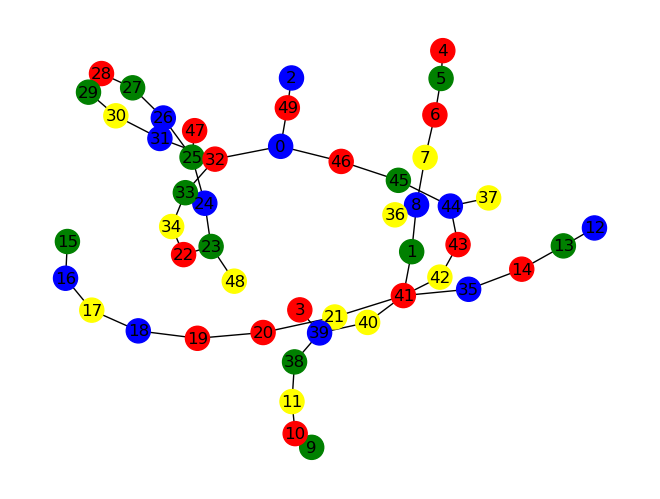



Number of conflicts in graph below:  2
1 iterations



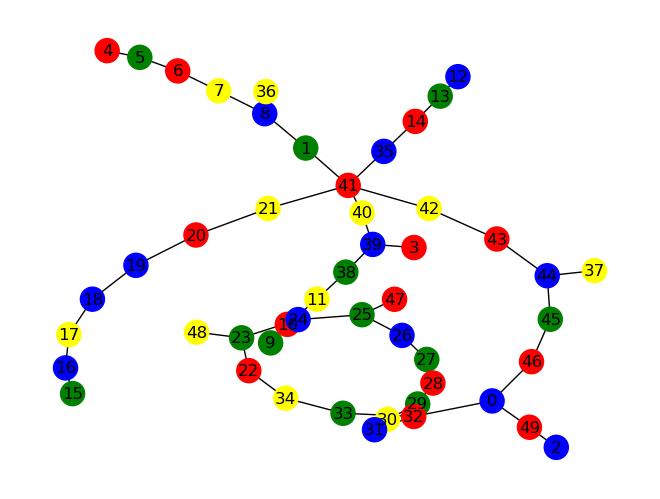



Number of conflicts in graph below:  2
2 iterations



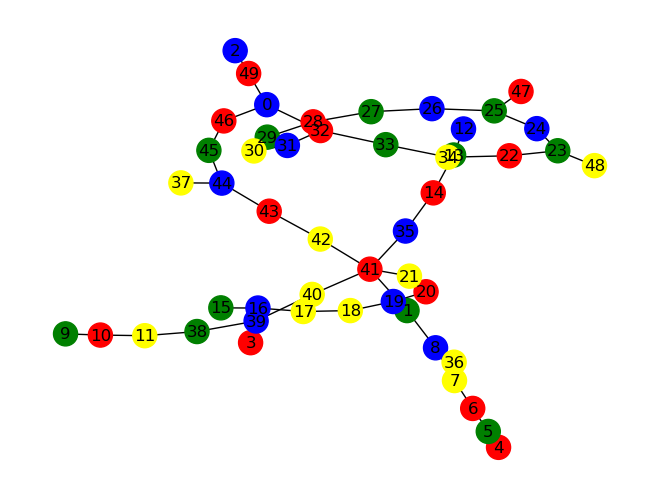



Number of conflicts in graph below:  2
3 iterations



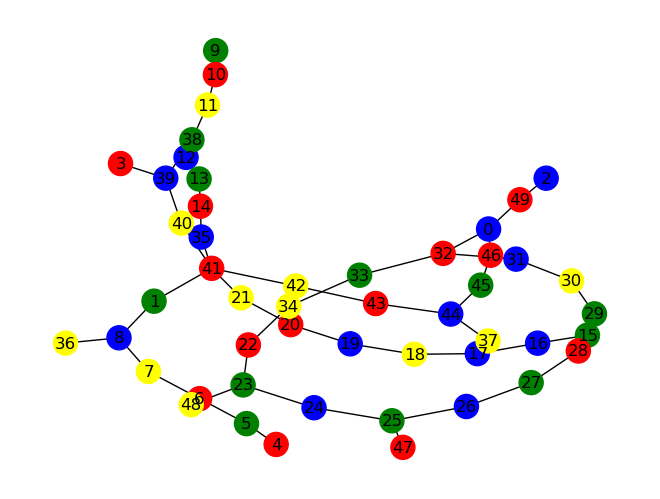



Number of conflicts in graph below:  2
4 iterations



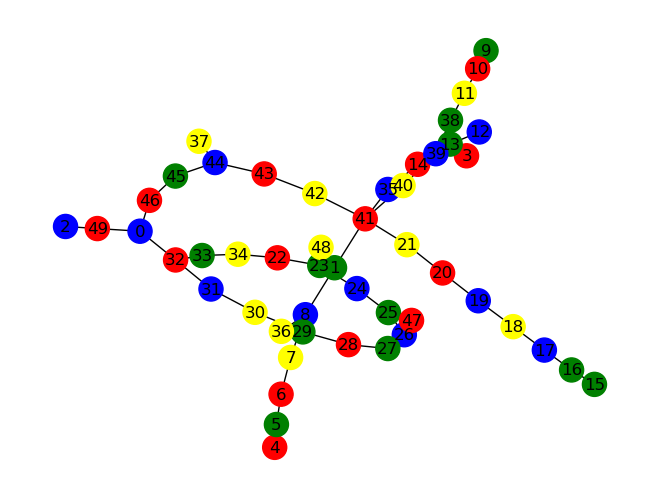



Number of conflicts in graph below:  0
5 iterations



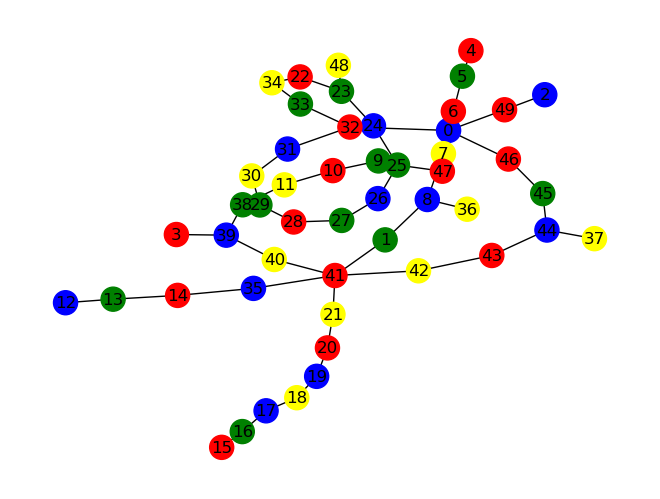

In [37]:
# PART TWO
# focus on the node with the least degrees first when i reduce the number of conflicts

list_conflicts = []

for i in range(0,51):
    original_four_colors_mapping_copy = reduce_conflicts_priority(G, original_four_colors_mapping_copy, four_colors)
    conflicts = count_conflicts(G, original_four_colors_mapping_copy)
    print("Number of conflicts in graph below: ", conflicts)
    print(i, "iterations\n")
    visualize_graph(G, original_four_colors_mapping_copy)
    list_conflicts.append(conflicts)
    #print("The smallest number of conflicts recorded is",min(list_conflicts))
    print("\n")
    if conflicts == 0:
        break   

# For four colors prioritising nodes with lower degrees did not improve the solution. The graph took 5 iterations to reach zero conflicts.

Number of conflicts in graph below:  5
0 iterations



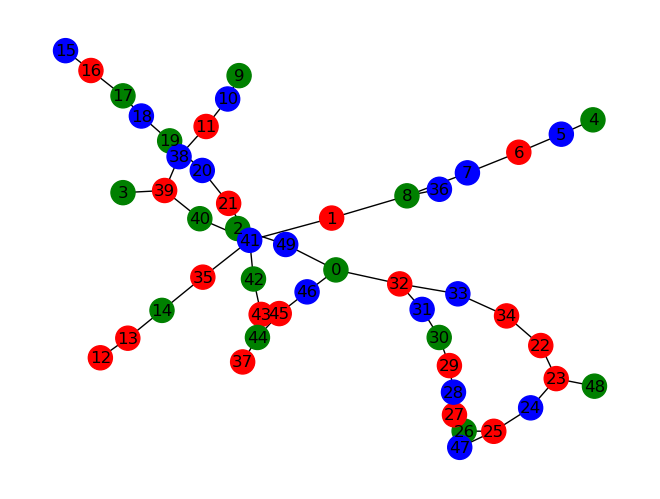



Number of conflicts in graph below:  0
1 iterations



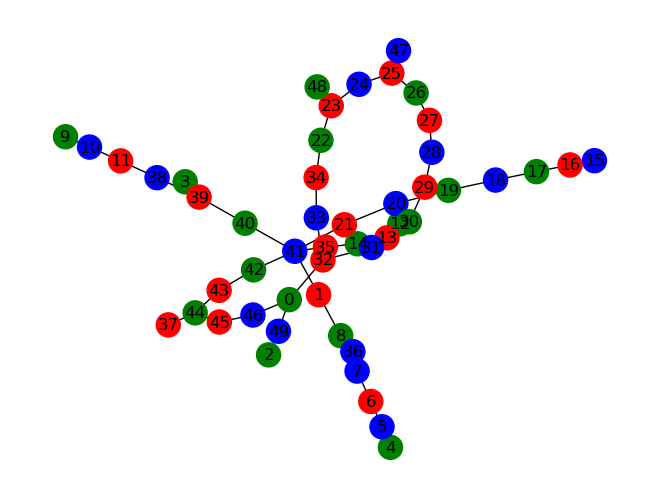

In [38]:
list_conflicts = []

for i in range(0,51):
    original_three_colors_mapping_copy = reduce_conflicts_priority(G, original_three_colors_mapping_copy, three_colors)
    conflicts = count_conflicts(G, original_three_colors_mapping_copy)
    print("Number of conflicts in graph below: ", conflicts)
    print(i, "iterations\n")
    visualize_graph(G, original_three_colors_mapping_copy)
    list_conflicts.append(conflicts)
    #print("The smallest number of conflicts recorded is",min(list_conflicts))
    print("\n")
    if conflicts == 0:
        break   

# For three colors priortising nodes with lower degree did improve the solution. The graph took 1 iteration to reach zero conflicts.

Number of conflicts in graph below:  4
0 iterations



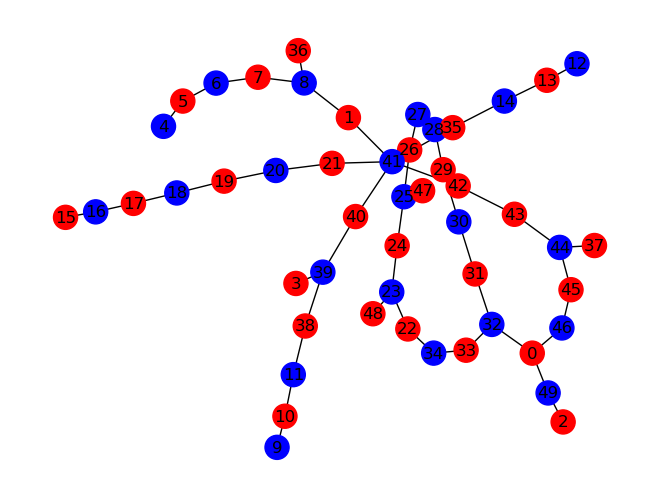

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
1 iterations



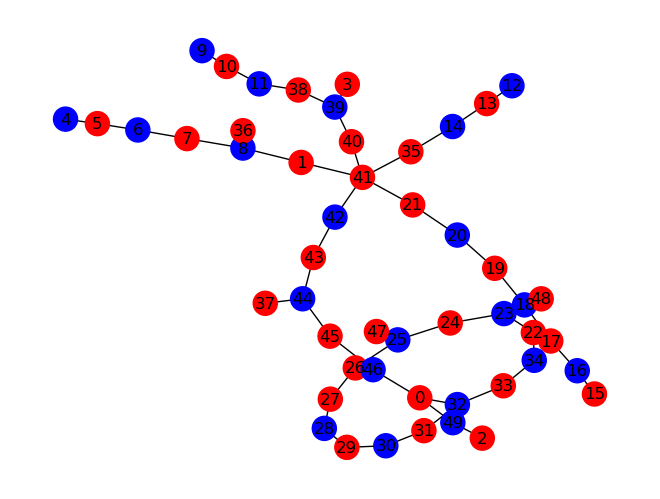

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  13
2 iterations



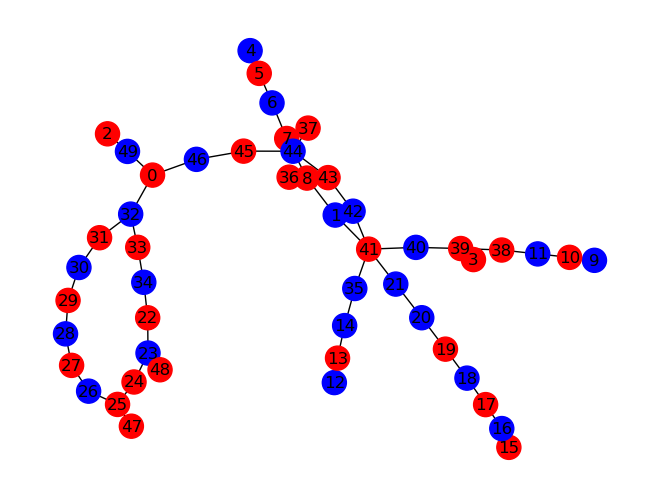

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  11
3 iterations



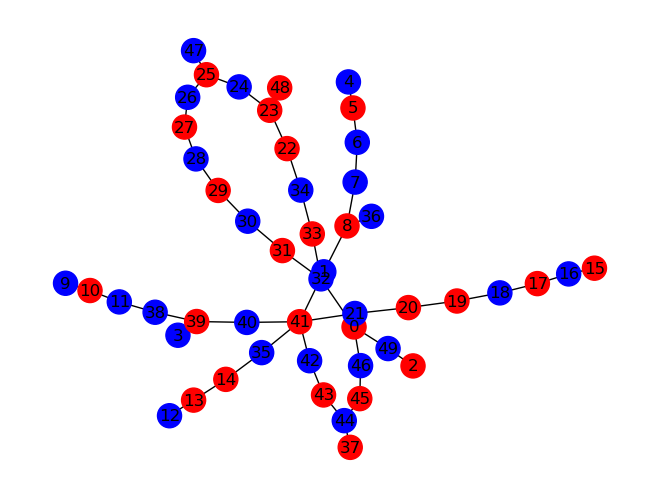

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  10
4 iterations



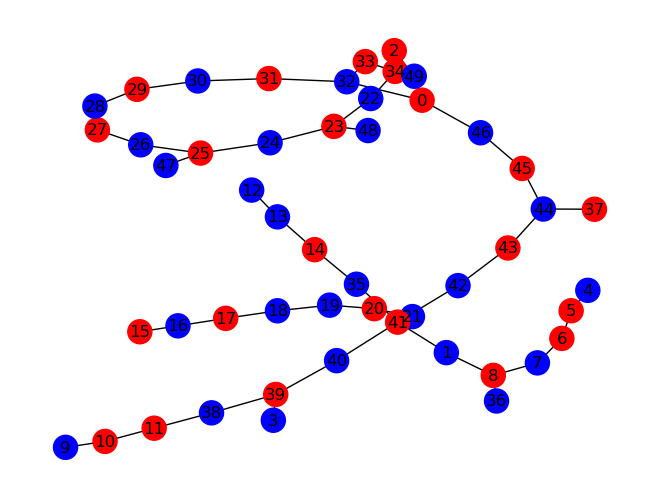

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  9
5 iterations



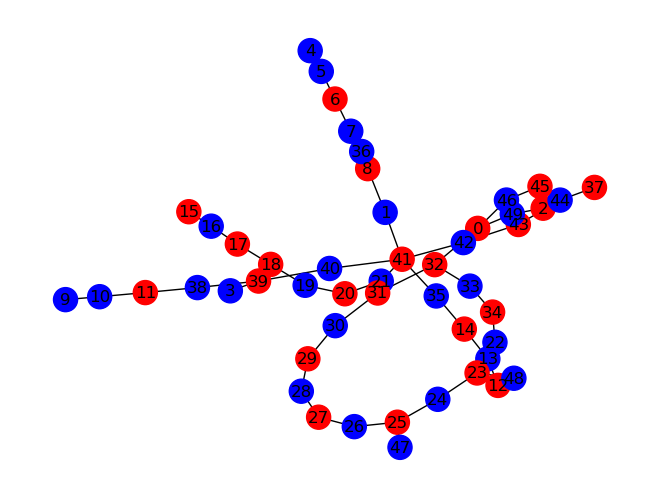

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
6 iterations



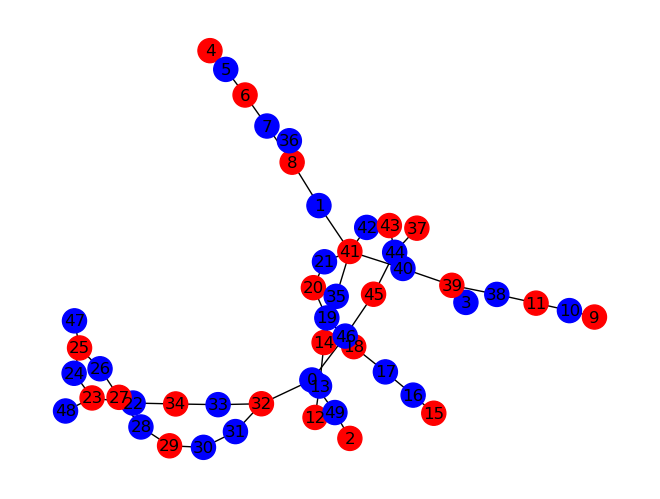

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  8
7 iterations



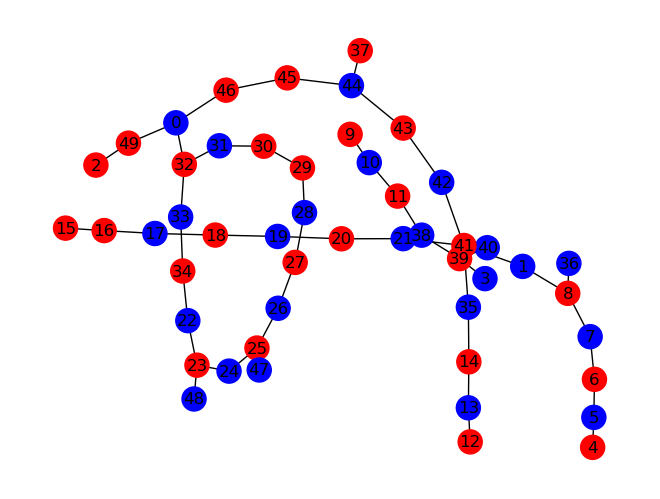

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  5
8 iterations



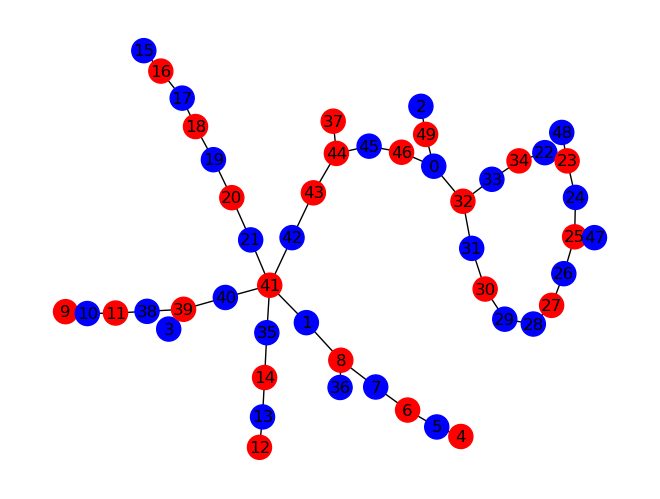

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  4
9 iterations



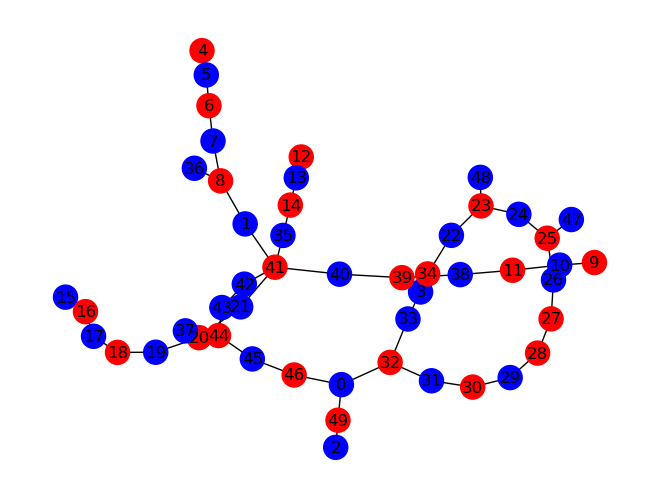

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
10 iterations



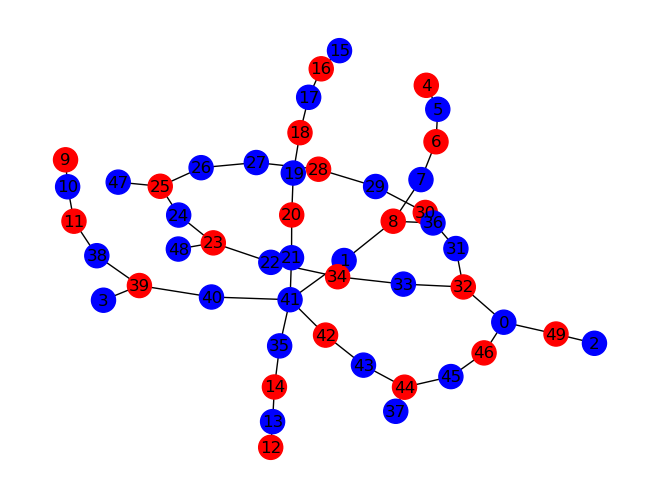

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  13
11 iterations



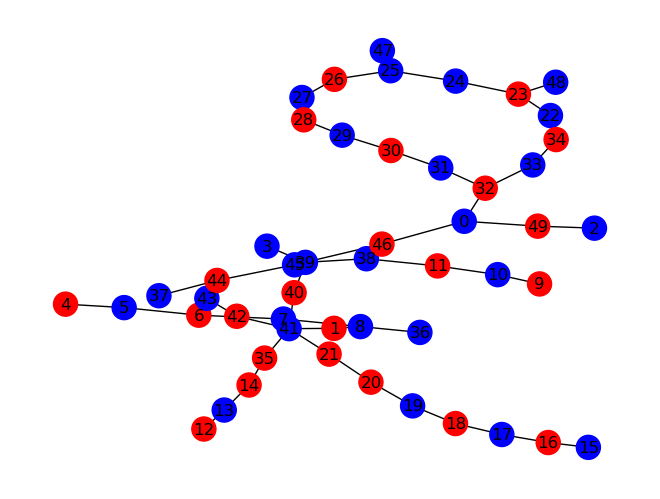

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  11
12 iterations



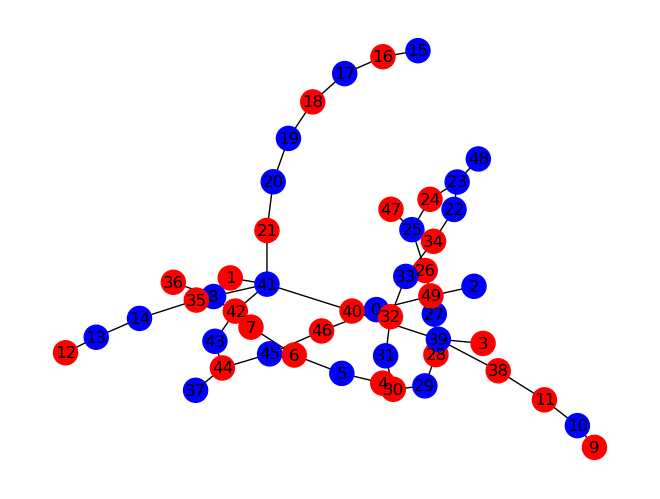

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  10
13 iterations



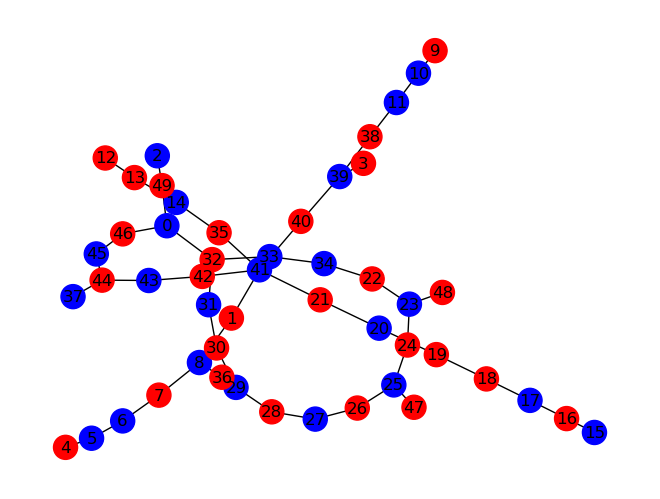

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  9
14 iterations



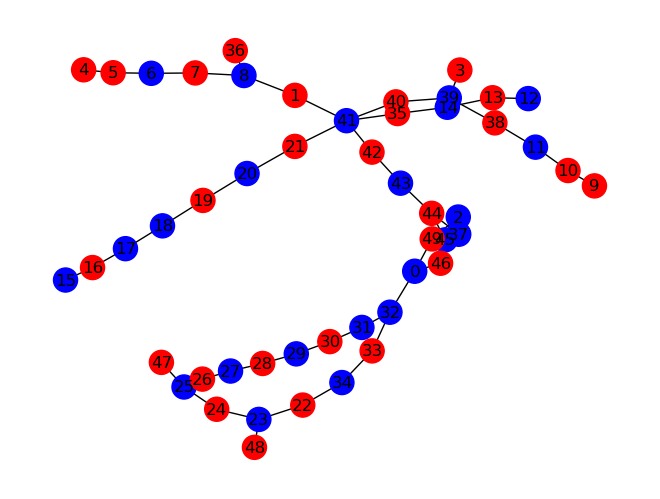

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
15 iterations



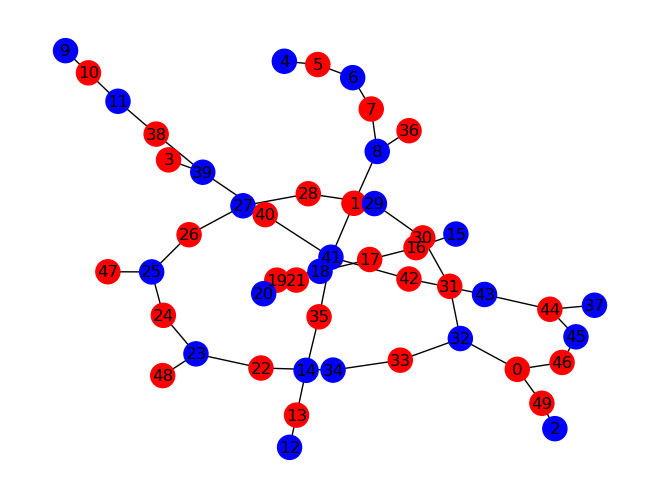

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  8
16 iterations



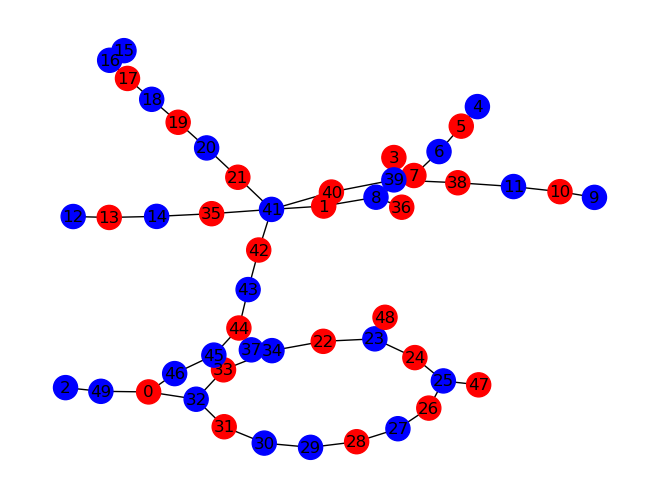

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  5
17 iterations



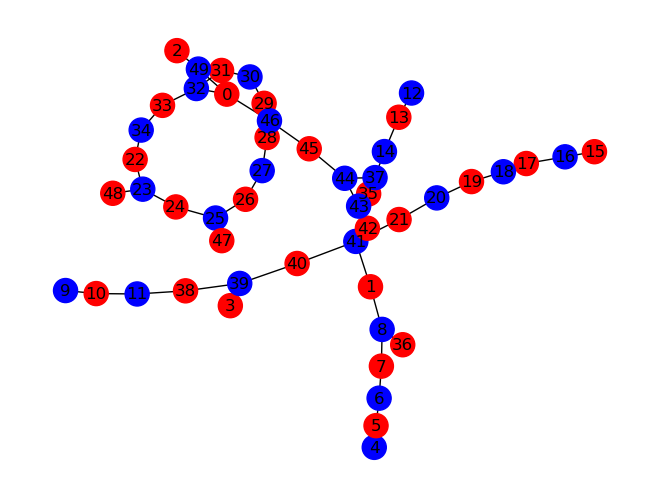

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  4
18 iterations



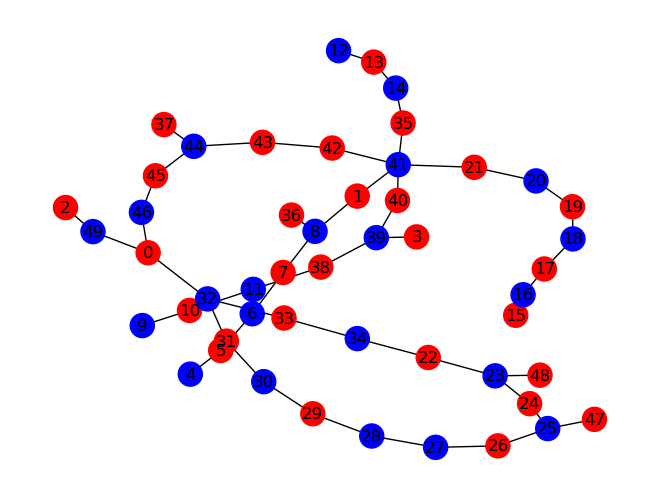

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
19 iterations



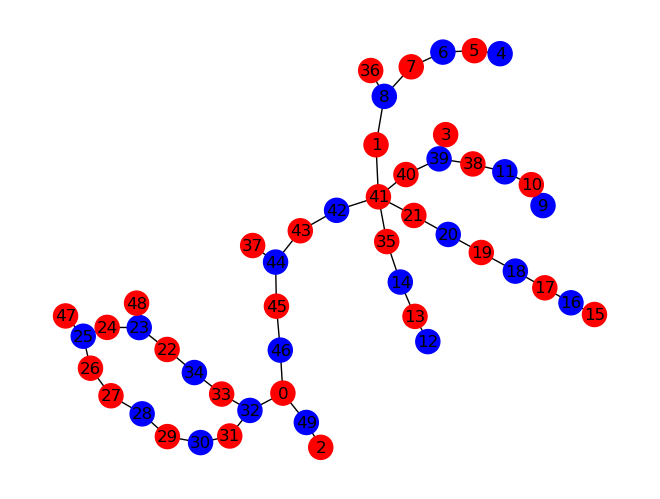

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  13
20 iterations



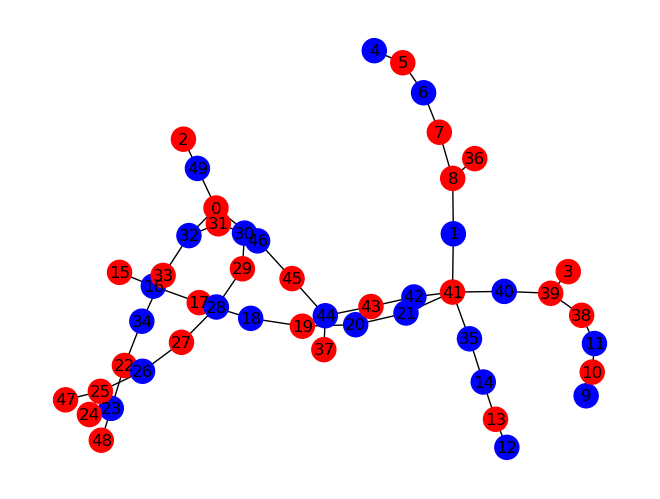

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  11
21 iterations



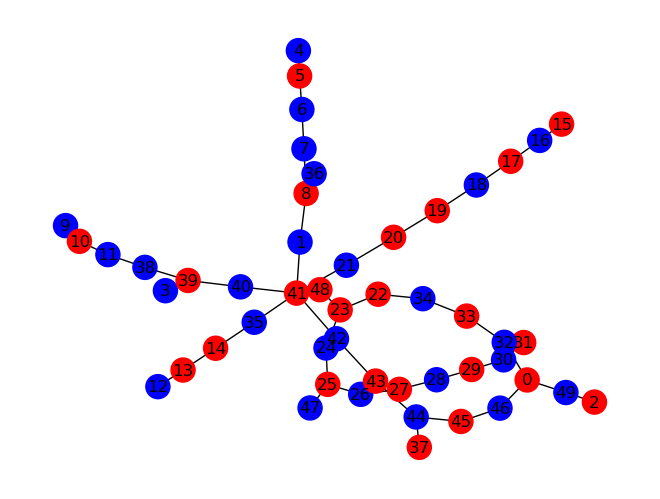

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  10
22 iterations



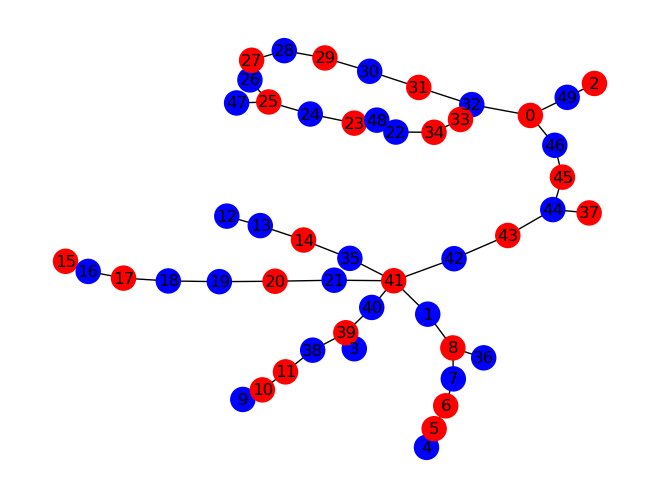

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  9
23 iterations



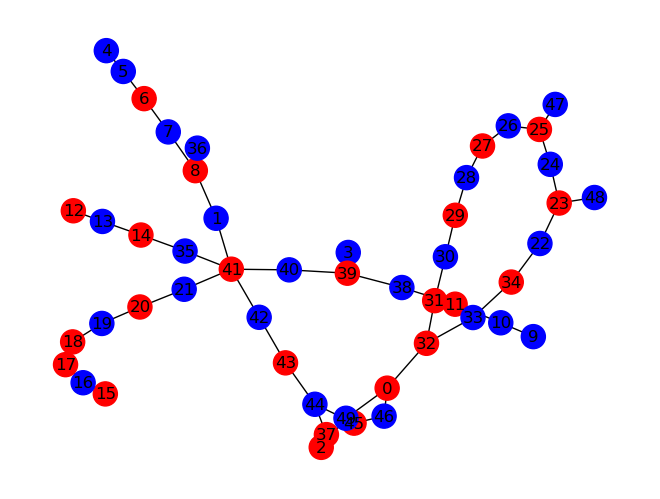

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
24 iterations



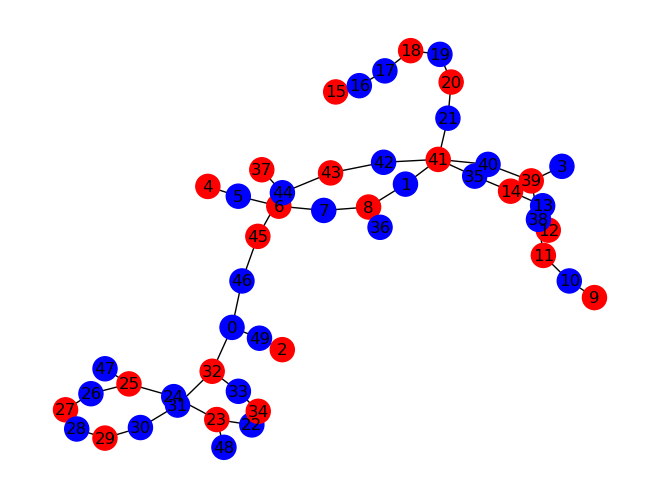

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  8
25 iterations



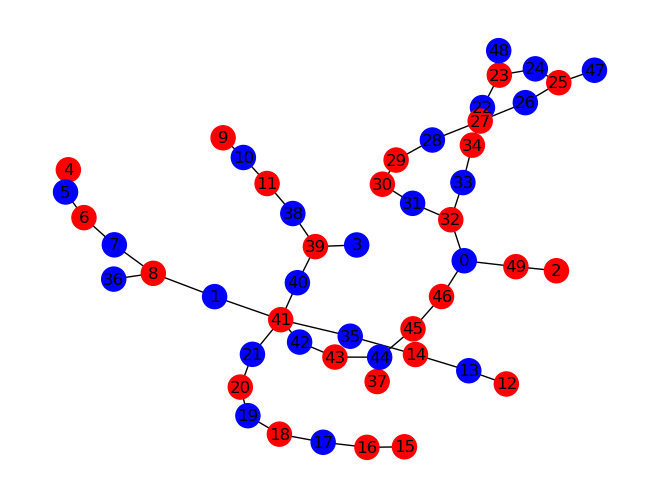

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  5
26 iterations



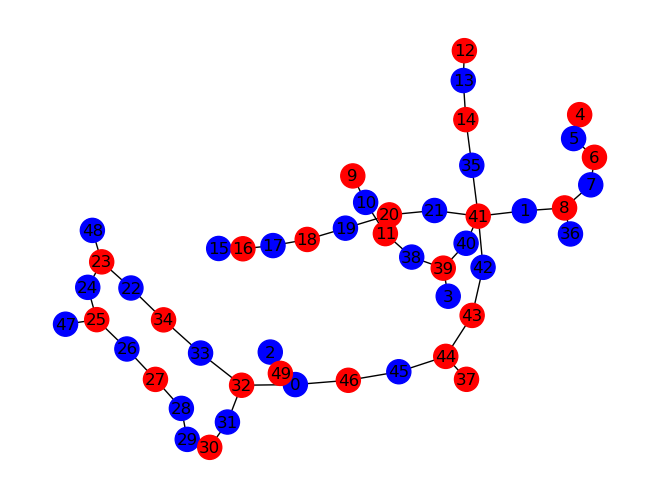

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  4
27 iterations



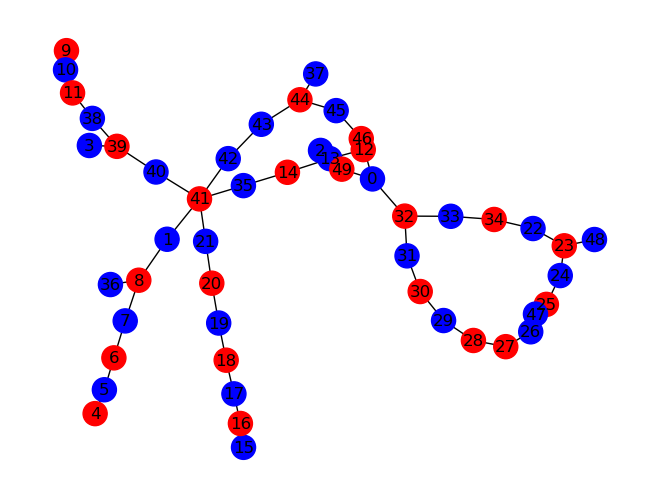

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
28 iterations



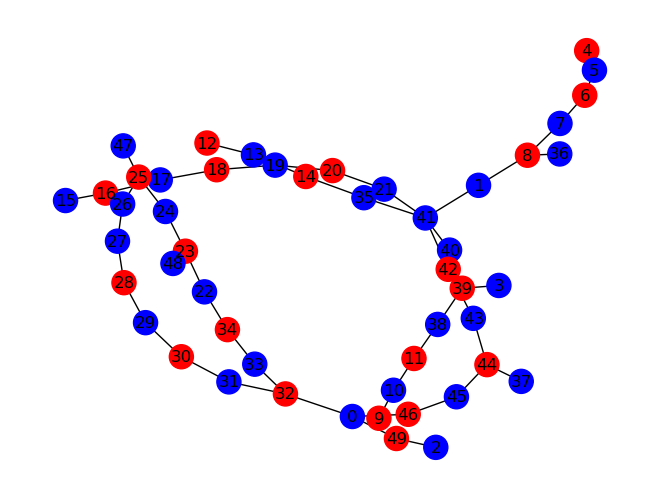

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  13
29 iterations



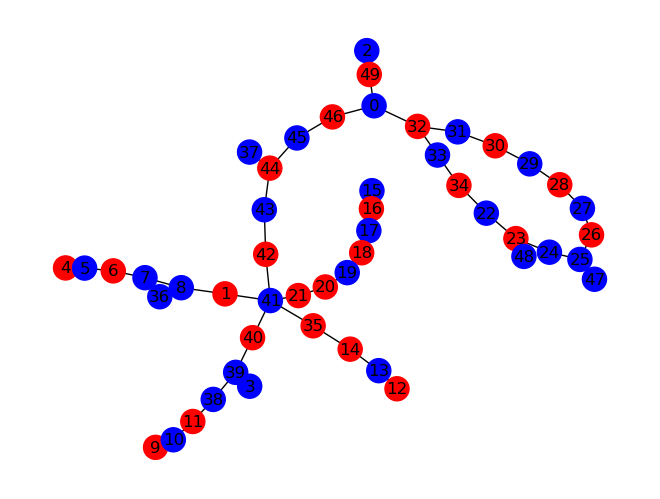

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  11
30 iterations



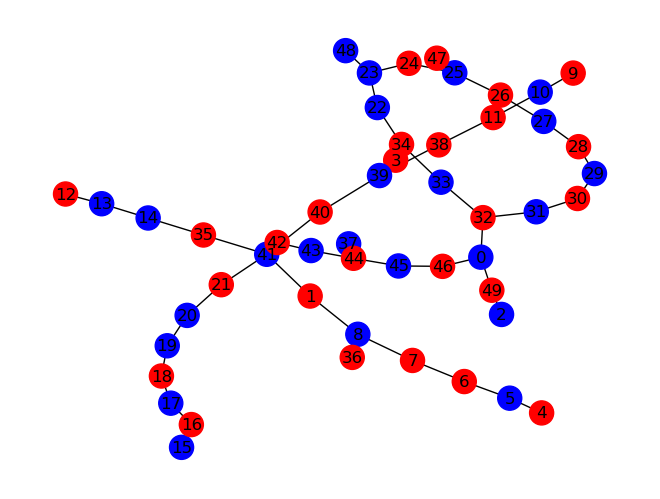

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  10
31 iterations



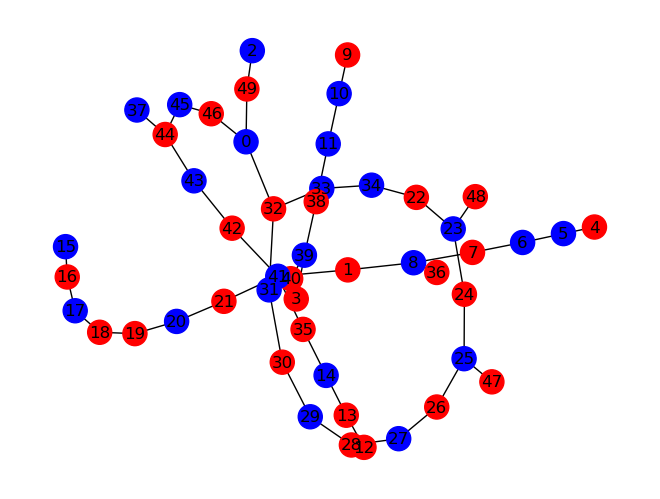

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  9
32 iterations



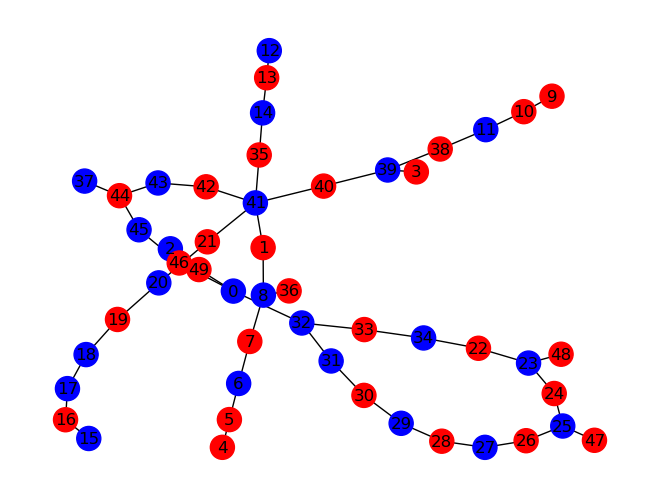

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
33 iterations



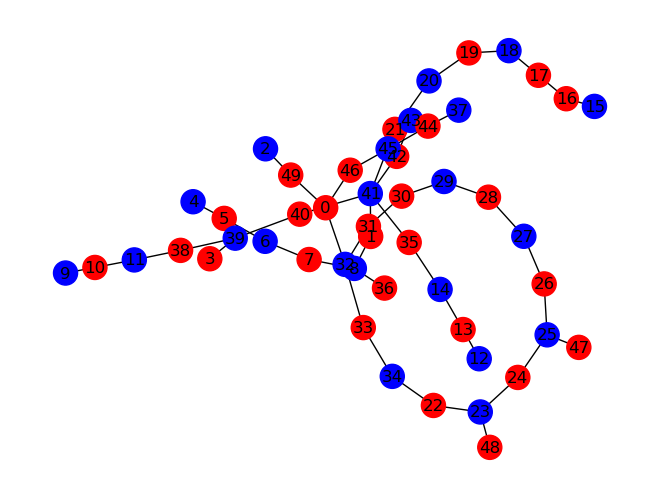

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  8
34 iterations



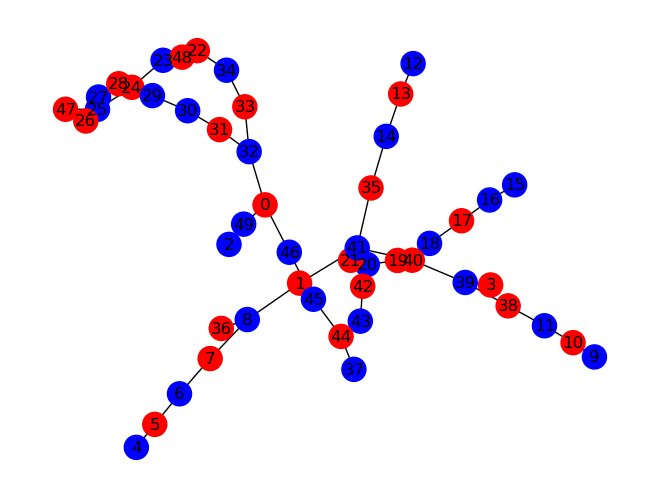

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  5
35 iterations



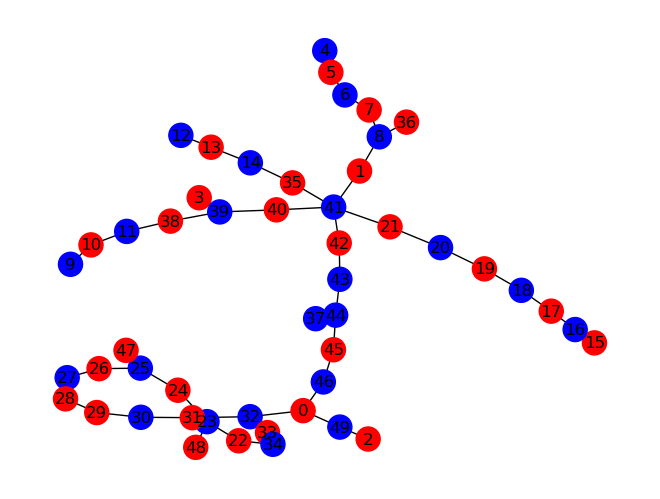

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  4
36 iterations



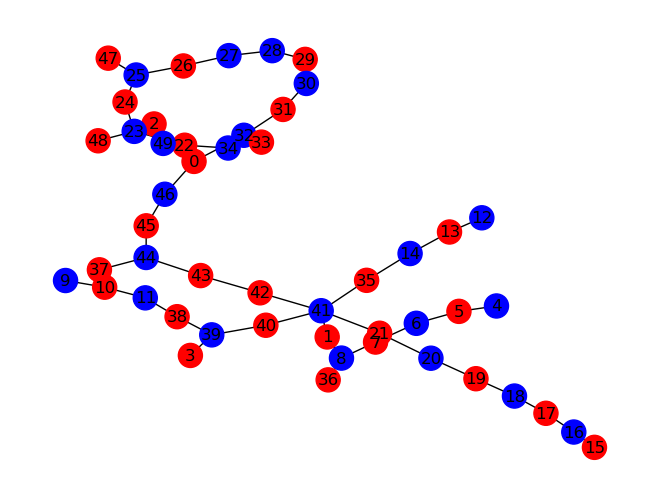

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
37 iterations



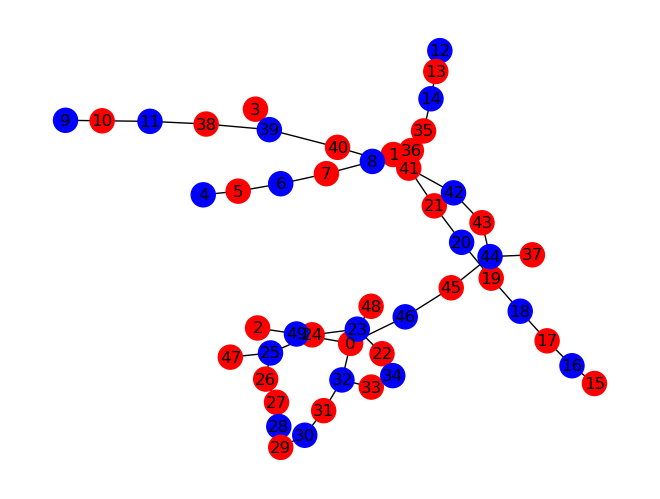

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  13
38 iterations



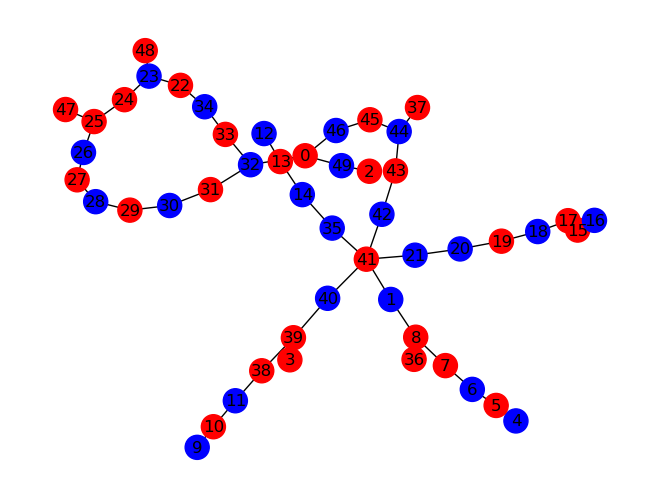

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  11
39 iterations



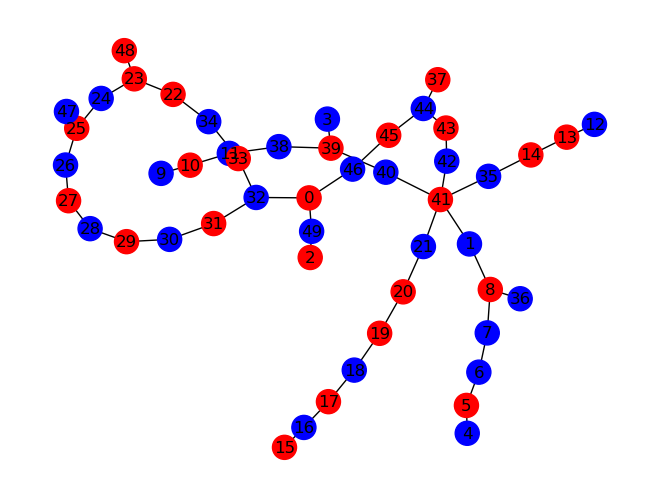

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  10
40 iterations



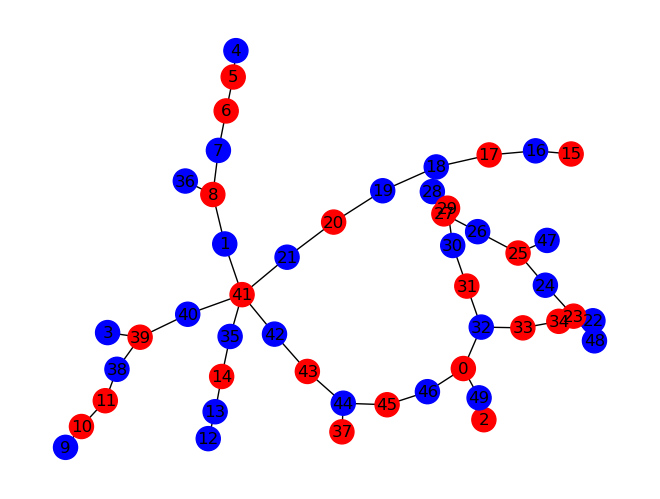

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  9
41 iterations



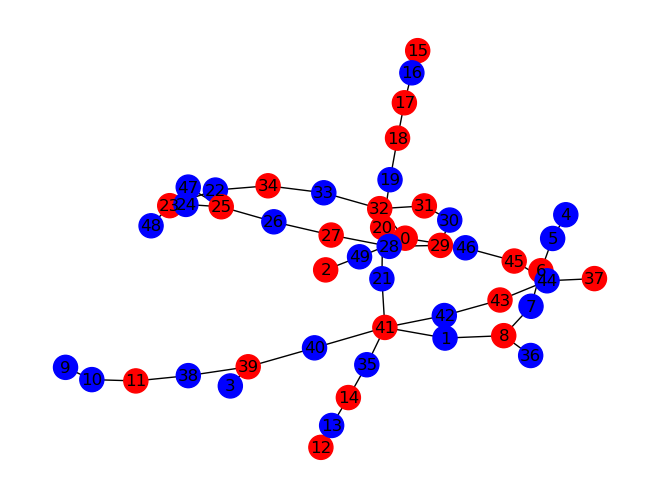

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
42 iterations



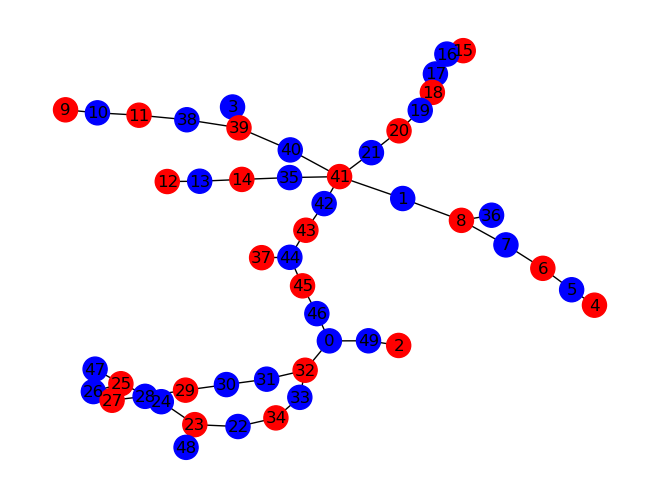

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  8
43 iterations



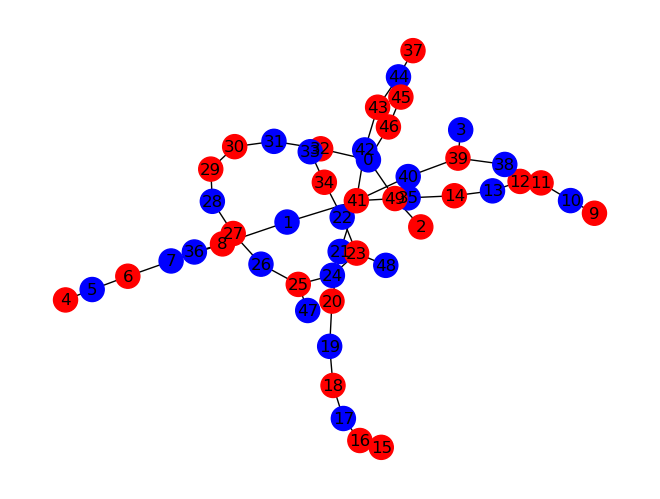

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  5
44 iterations



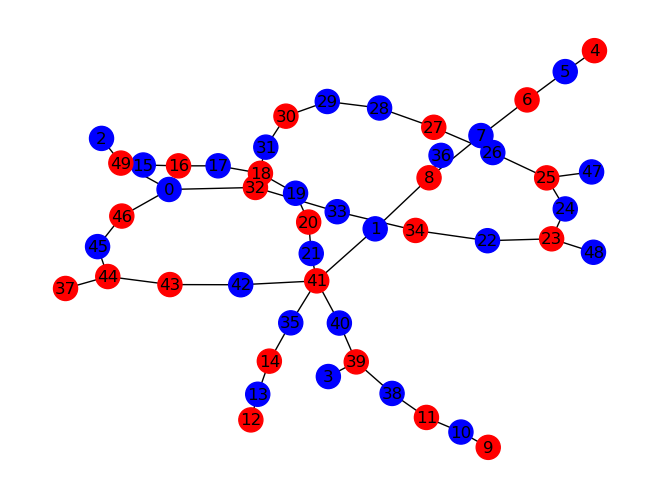

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  4
45 iterations



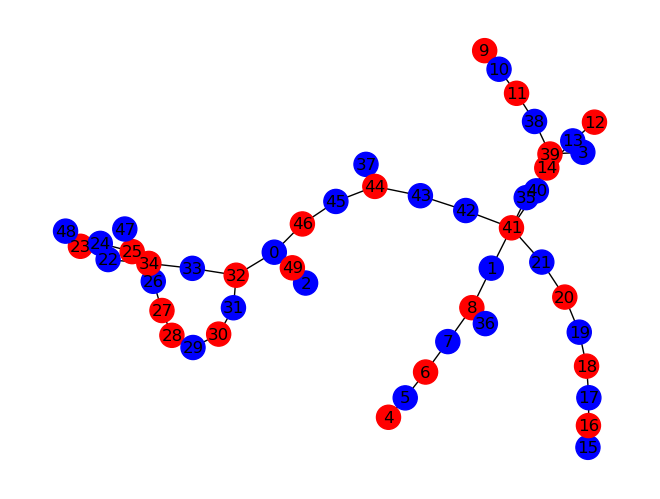

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  7
46 iterations



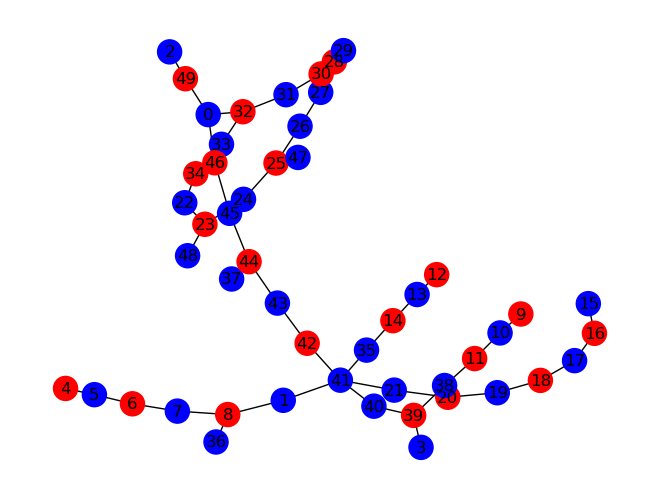

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  13
47 iterations



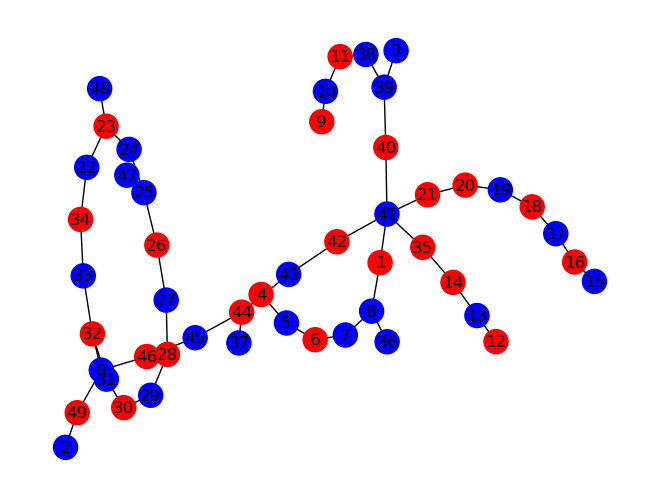

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  11
48 iterations



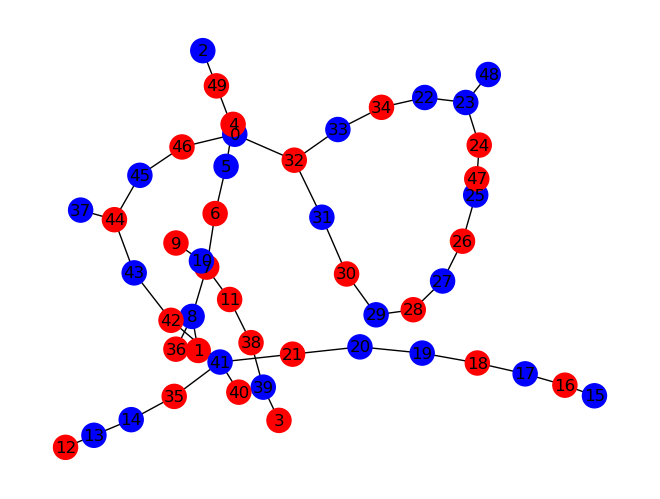

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  10
49 iterations



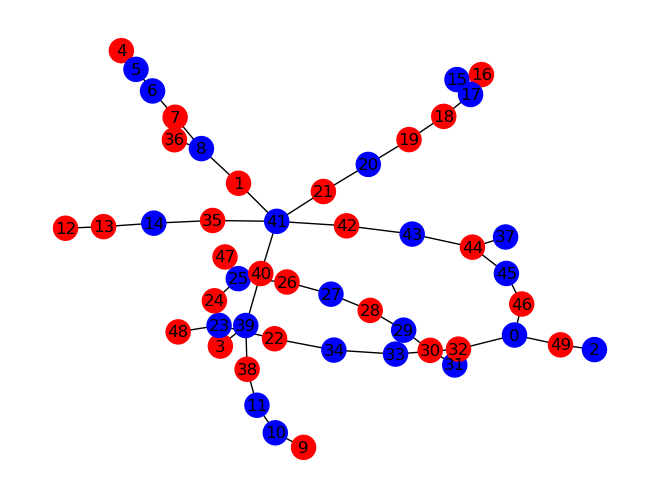

The smallest number of conflicts recorded is 4


Number of conflicts in graph below:  9
50 iterations



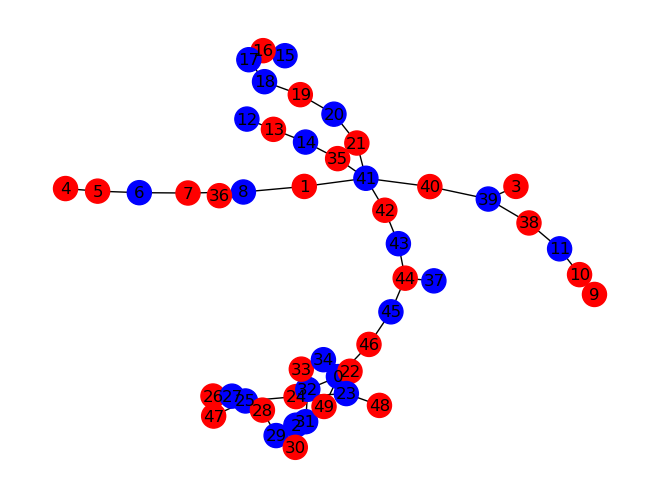

The smallest number of conflicts recorded is 4




In [40]:
list_conflicts = []

for i in range(0,51):
    original_two_colors_mapping_copy = reduce_conflicts_priority(G, original_two_colors_mapping_copy, two_colors)
    conflicts = count_conflicts(G, original_two_colors_mapping_copy)
    print("Number of conflicts in graph below: ", conflicts)
    print(i, "iterations\n")
    visualize_graph(G, original_two_colors_mapping_copy)
    list_conflicts.append(conflicts)
    print("The smallest number of conflicts recorded is",min(list_conflicts))
    print("\n")
    if conflicts == 0:
        break   


# For two colors priotising nodes with lower degrees, the graph still never reached zero conflicts. The lowest number of conflicts reached was 4.

# It seems that priotising that nodes with lower degree may have an impact on the solution. We don't have a big enough sample size to say this with 100% certainity. It looks like graph reaches a low number of conflicts quicker when priotising a lower number of nodes.